# 1. Defining Question.

### a) Specifying the Data Analysis Question

What are the factors that contribute to the death rate of cancer patients.

### b.) Defining metric for success.

For this analysis we will have a combination of metrics that will be used to assess the suitability of our models to the task at hand. What we are looking for is a model that abides by the assumptions of linear regression while giving the highest R2 score possible and the least RMSE score.

### c.) Understanding the context.

The data utilised in this analysis falls within the context of medical research, specifically cancer related medical research. Cancer prevalence within a population is influenced by a myrad of factors. Each of these factors have varying significance in terms of the influence they have in determining how much of the population get afflicted by the desease and for those afflicted there also exists a collection of factors that determine wether they succumb to the desease or they pull through. Understanding which factors have great significance with respect to the prevalence of the desease and the mortality rate is therefore crucial as this would help medical research teams to have more focused initiatives to battle the scourge.

### d.) Recording the Experimental Design

I took the following steps throughout my notebook.

1.) Business Understanding, this keeps you grounded to the main question and gives light throughout all your analysis.

2.) Reading the data.

3.) Data Exploration

4.) Data Wrangling, here is where I performed all my data cleaning and preparation to make my data ready for analysis.

5.) EDA, here is where I did my analysis and visualization of the data.

6.) Feature Engineering, preparing my data for modeling.

7.) Model Development.

### e.) Data Relevance

Given the problem , the data was relevant. 

# 2. Data Preparation and Cleaning.

In [1]:
#Before executing this notebook install basemap with anaconda

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling as pp
%matplotlib inline


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 2.1 Loading and previewing Data.

In [3]:
df = pd.read_csv('cancer.csv')

In [4]:
df.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

In [5]:
df.head(5)

avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popest2015  povertypercent  studypercap           binnedinc  medianage  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   medianagemale  medianagefemale                     geography  \
0           36.9             41.7     Kitsap County, Washington   
1           32.2             33.7   Kittitas County, Washington   
2           44.0             45.8  Klickitat County, Washington   
3           42.2             43.4      Lewis County, Washington   
4           47.8             48.9    Lincoln County, Washington   

   percentmarried  pctnohs18_24  pcths18_24  pctsomecol18_24  pctbachdeg18_24  \
0            52.5          11.5        39.5             42.1              6.9   
1            44.5           6.1        22.4             64.0              7.5   
2            54.2          24.0        36.6              NaN              9.5   
3            52.7          20.2        41.2             36.1              2.5   
4            57.8          14.9        43.0             40.0              2.0   

   pcths25_over  pctbachdeg25_over  pctemployed16_over  pctunemployed16_over  \
0          23.2               19.6                51.9                   8.0   
1          26.0               22.7                55.9                   7.8   
2          29.0               16.0                45.9                   7.0   
3          31.6                9.3                48.3                  12.1   
4          33.4               15.0                48.2                   4.8   

   pctprivatecoverage  pctprivatecoveragealone  pctempprivcoverage  \
0                75.1                      NaN                41.6   
1                70.2                     53.8                43.6   
2                63.7                     43.5                34.9   
3                58.4                     40.3                35.0   
4                61.6                     43.9                35.1   

   pctpubliccoverage  pctpubliccoveragealone   pctwhite  pctblack  pctasian  \
0               32.9                    14.0  81.780529  2.594728  4.821857   
1               31.1                    15.3  89.228509  0.969102  2.246233   
2               42.1                    21.1  90.922190  0.739673  0.465898   
3               45.3                    25.0  91.744686  0.782626  1.161359   
4               44.0                    22.7  94.104024  0.270192  0.665830   

   pctotherrace  pctmarriedhouseholds  birthrate  
0      1.843479             52.856076   6.118831  
1      3.741352             45.372500   4.333096  
2      2.747358             54.444868   3.729488  
3      1.362643             51.021514   4.603841  
4      0.492135             54.027460   6.796657

In [6]:
df.shape

(3047, 33)

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

avganncount                float64
avgdeathsperyear             int64
target_deathrate           float64
incidencerate              float64
medincome                    int64
popest2015                   int64
povertypercent             float64
studypercap                float64
binnedinc                   object
medianage                  float64
medianagemale              float64
medianagefemale            float64
geography                   object
percentmarried             float64
pctnohs18_24               float64
pcths18_24                 float64
pctsomecol18_24            float64
pctbachdeg18_24            float64
pcths25_over               float64
pctbachdeg25_over          float64
pctemployed16_over         float64
pctunemployed16_over       float64
pctprivatecoverage         float64
pctprivatecoveragealone    float64
pctempprivcoverage         float64
pctpubliccoverage          float64
pctpubliccoveragealone     float64
pctwhite                   float64
pctblack            

In [9]:
df.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

### 2.2 Cleaning the Data

In [10]:
#dropping the columns because it's the only way that our accuracy won't be skewed.

df.drop(['pctsomecol18_24'],inplace = True, axis = 1)
df.drop(['pctprivatecoveragealone'],inplace = True, axis = 1)
df.drop(['pctemployed16_over'],inplace = True, axis = 1)

In [11]:
df.isnull().sum()

avganncount               0
avgdeathsperyear          0
target_deathrate          0
incidencerate             0
medincome                 0
popest2015                0
povertypercent            0
studypercap               0
binnedinc                 0
medianage                 0
medianagemale             0
medianagefemale           0
geography                 0
percentmarried            0
pctnohs18_24              0
pcths18_24                0
pctbachdeg18_24           0
pcths25_over              0
pctbachdeg25_over         0
pctunemployed16_over      0
pctprivatecoverage        0
pctempprivcoverage        0
pctpubliccoverage         0
pctpubliccoveragealone    0
pctwhite                  0
pctblack                  0
pctasian                  0
pctotherrace              0
pctmarriedhouseholds      0
birthrate                 0
dtype: int64

In [12]:
df.duplicated().sum()

0

# 3. Data Exploration.

In [13]:
df.head(5)

avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popest2015  povertypercent  studypercap           binnedinc  medianage  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   medianagemale  medianagefemale                     geography  \
0           36.9             41.7     Kitsap County, Washington   
1           32.2             33.7   Kittitas County, Washington   
2           44.0             45.8  Klickitat County, Washington   
3           42.2             43.4      Lewis County, Washington   
4           47.8             48.9    Lincoln County, Washington   

   percentmarried  pctnohs18_24  pcths18_24  pctbachdeg18_24  pcths25_over  \
0            52.5          11.5        39.5              6.9          23.2   
1            44.5           6.1        22.4              7.5          26.0   
2            54.2          24.0        36.6              9.5          29.0   
3            52.7          20.2        41.2              2.5          31.6   
4            57.8          14.9        43.0              2.0          33.4   

   pctbachdeg25_over  pctunemployed16_over  pctprivatecoverage  \
0               19.6                   8.0                75.1   
1               22.7                   7.8                70.2   
2               16.0                   7.0                63.7   
3                9.3                  12.1                58.4   
4               15.0                   4.8                61.6   

   pctempprivcoverage  pctpubliccoverage  pctpubliccoveragealone   pctwhite  \
0                41.6               32.9                    14.0  81.780529   
1                43.6               31.1                    15.3  89.228509   
2                34.9               42.1                    21.1  90.922190   
3                35.0               45.3                    25.0  91.744686   
4                35.1               44.0                    22.7  94.104024   

   pctblack  pctasian  pctotherrace  pctmarriedhouseholds  birthrate  
0  2.594728  4.821857      1.843479             52.856076   6.118831  
1  0.969102  2.246233      3.741352             45.372500   4.333096  
2  0.739673  0.465898      2.747358             54.444868   3.729488  
3  0.782626  1.161359      1.362643             51.021514   4.603841  
4  0.270192  0.665830      0.492135             54.027460   6.796657

In [14]:
df.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctbachdeg18_24',
       'pcths25_over', 'pctbachdeg25_over', 'pctunemployed16_over',
       'pctprivatecoverage', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

In [15]:
#get to know unique values in each column

my_cols = df.columns.to_list()

for column in my_cols:
    print("\n")
    print("Column Name:", column)
    print(df[column].unique())




Column Name: avganncount
[1.39700000e+03 1.73000000e+02 1.02000000e+02 4.27000000e+02
 5.70000000e+01 4.28000000e+02 2.50000000e+02 1.46000000e+02
 8.80000000e+01 4.02500000e+03 1.13000000e+02 7.40000000e+02
 5.50000000e+01 3.43800000e+03 2.26500000e+03 2.51000000e+02
 1.39000000e+03 3.20000000e+01 3.05000000e+02 1.08100000e+03
 1.34000000e+02 9.58000000e+02 9.40000000e+01 4.99000000e+02
 1.52000000e+02 8.00000000e+01 1.64000000e+02 5.64000000e+02
 5.00000000e+01 7.00000000e+01 2.50000000e+01 2.80000000e+02
 4.50000000e+01 5.80000000e+01 1.45000000e+02 2.18000000e+02
 6.80000000e+01 4.49000000e+02 1.82000000e+02 2.45000000e+02
 1.28500000e+03 1.24000000e+02 1.39000000e+02 1.37000000e+02
 3.73000000e+02 2.08000000e+02 1.68000000e+02 4.18000000e+02
 1.70000000e+02 1.63000000e+02 3.82000000e+02 8.60000000e+01
 1.05000000e+02 1.60000000e+02 3.08000000e+02 1.83000000e+02
 3.28000000e+02 4.82000000e+02 1.61000000e+02 7.20000000e+01
 8.90000000e+01 7.60000000e+01 8.70000000e+01 5.60000000e+

In [16]:
#getting a detailed summary of our dataset.

pp.ProfileReport(df)

In [18]:
sns.set(rc={'figure.figsize':(13, 10)})

### Data Distribution

In [19]:
df['target_deathrate'].describe()

count    3047.000000
mean      178.664063
std        27.751511
min        59.700000
25%       161.200000
50%       178.100000
75%       195.200000
max       362.800000
Name: target_deathrate, dtype: float64

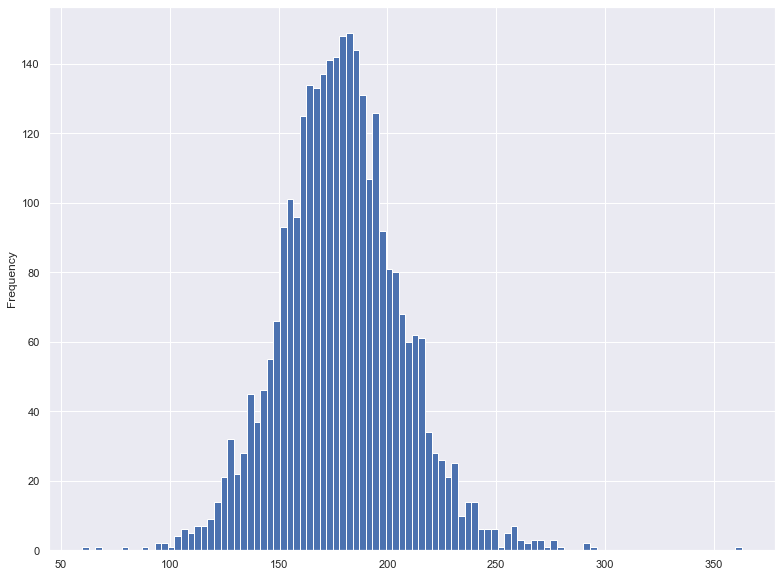

In [20]:
df['target_deathrate'].plot.hist(bins=100)

The Mean per capita concer mortalities seems to follow a normal distribution centered around the mean. The mean and median are also almost equal, this implies that the mean per capita cancer mortality rates has relatively low skewness. 

In [21]:
df['avganncount'].describe()

count     3047.000000
mean       606.338544
std       1416.356223
min          6.000000
25%         76.000000
50%        171.000000
75%        518.000000
max      38150.000000
Name: avganncount, dtype: float64

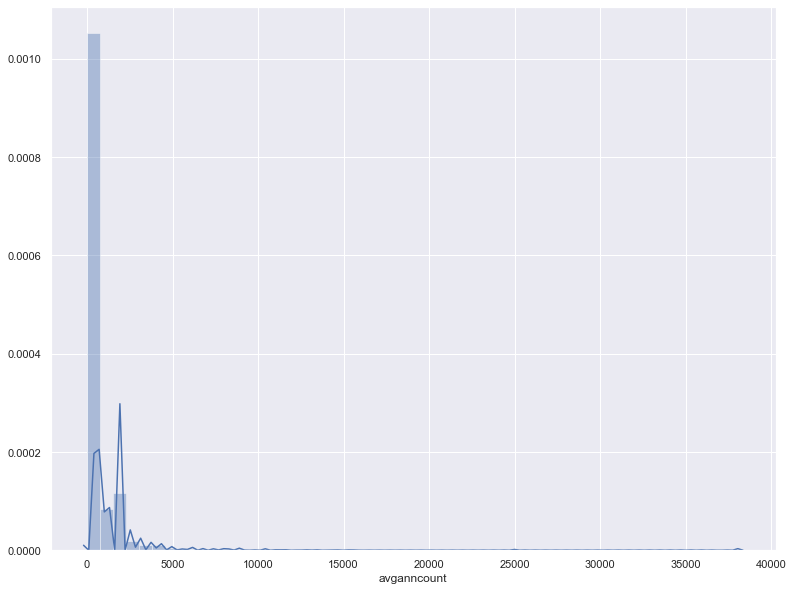

In [22]:
sns.distplot(df['avganncount'], bins=50)


avganncount contains values reprensenting the mean number of reported cancer diagnosis anually. Here we see that is skewed towards the right showing that most counties generally report a relatively low mean annual cancer diagnosis. The skewness observed here throws the suitability of this feature as a valuable predictor for mean per cancer mortality rate in question.

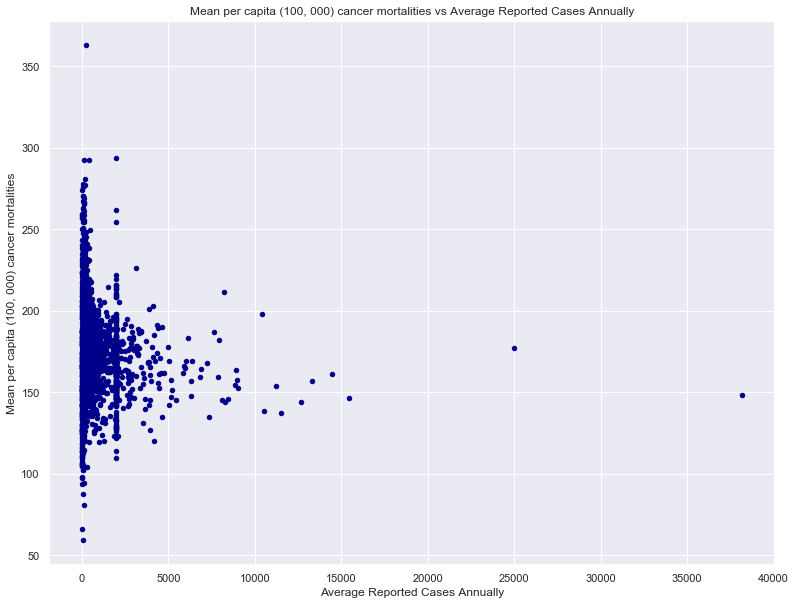

In [23]:
df[['target_deathrate', 'avganncount']].plot.scatter(x='avganncount', y='target_deathrate', c='DarkBlue')
plt.xlabel('Average Reported Cases Annually')
plt.ylabel('Mean per capita (100, 000) cancer mortalities')
plt.title('Mean per capita (100, 000) cancer mortalities vs Average Reported Cases Annually')
plt.show()


In [24]:
df['avgdeathsperyear'].describe()

count     3047.000000
mean       185.965868
std        504.134286
min          3.000000
25%         28.000000
50%         61.000000
75%        149.000000
max      14010.000000
Name: avgdeathsperyear, dtype: float64

In [25]:
df['avgdeathsperyear'].value_counts()

13       40
24       39
14       37
16       37
15       35
19       35
7        34
28       34
9        34
25       33
41       32
17       32
22       31
21       30
6        30
48       30
12       30
39       30
47       29
20       29
23       28
29       28
11       28
27       28
4        28
32       28
54       27
40       27
33       26
31       26
49       25
43       25
10       25
30       24
5        24
26       23
50       23
37       23
18       23
60       23
8        23
36       23
35       22
42       22
46       22
44       21
78       21
45       21
52       21
70       20
64       20
69       19
65       19
59       19
56       19
51       19
38       18
63       18
55       17
76       17
61       17
85       16
34       16
58       16
62       16
57       15
101      15
53       14
72       14
91       13
80       12
73       12
68       12
86       12
87       12
81       12
89       12
66       11
93       11
67       11
82       11
84       11
77       11
105 

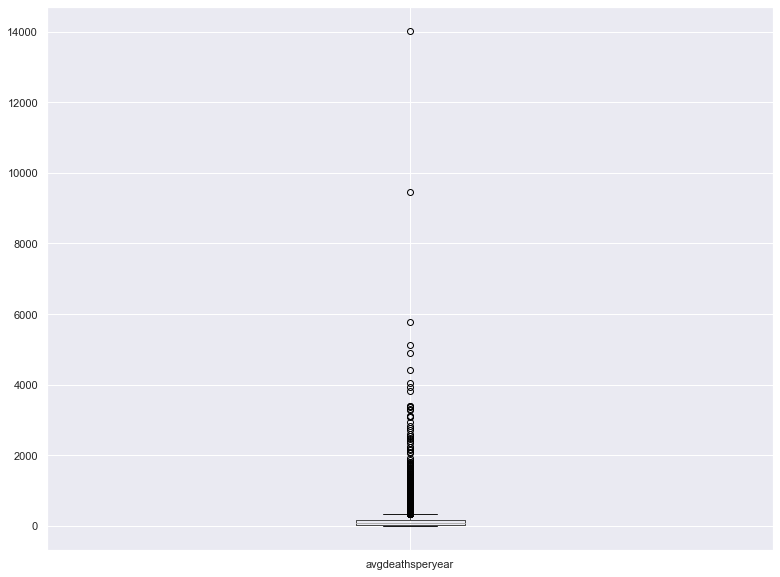

In [26]:
df.boxplot(column=['avgdeathsperyear'])

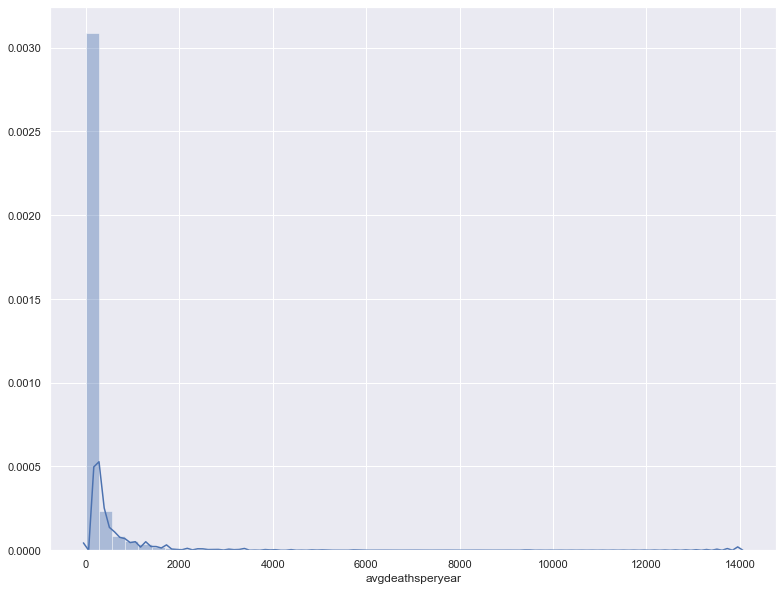

In [27]:
sns.distplot(df['avgdeathsperyear'])

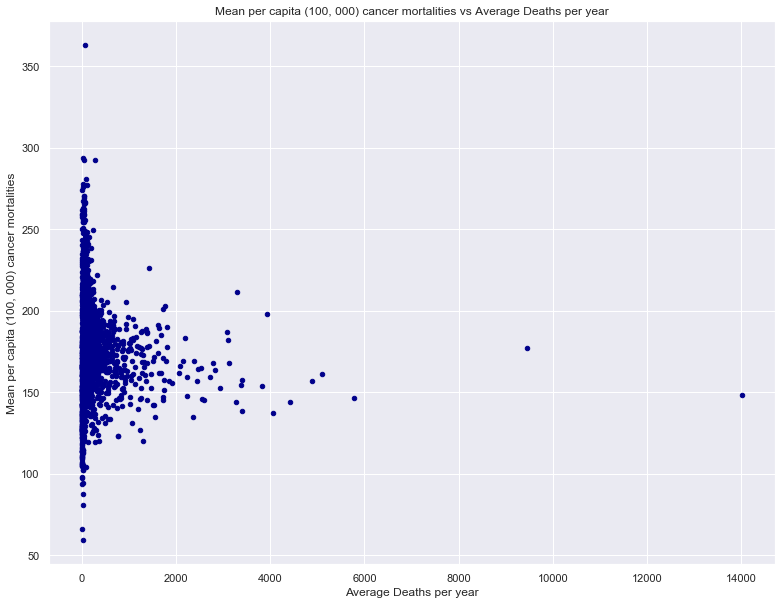

In [28]:
df[['target_deathrate', 'avgdeathsperyear']].plot.scatter(x='avgdeathsperyear', y='target_deathrate', c='DarkBlue')
plt.xlabel('Average Deaths per year')
plt.ylabel('Mean per capita (100, 000) cancer mortalities')
plt.title('Mean per capita (100, 000) cancer mortalities vs Average Deaths per year')
plt.show()

Average deaths per year also follows a similar distribution to that of the mean annual cancer diagnosis and thus suffers from similar limitations as the ones we identified with avganncount feature.

In [29]:
df['incidencerate'].describe()

count    3047.000000
mean      448.268586
std        54.560733
min       201.300000
25%       420.300000
50%       453.549422
75%       480.850000
max      1206.900000
Name: incidencerate, dtype: float64

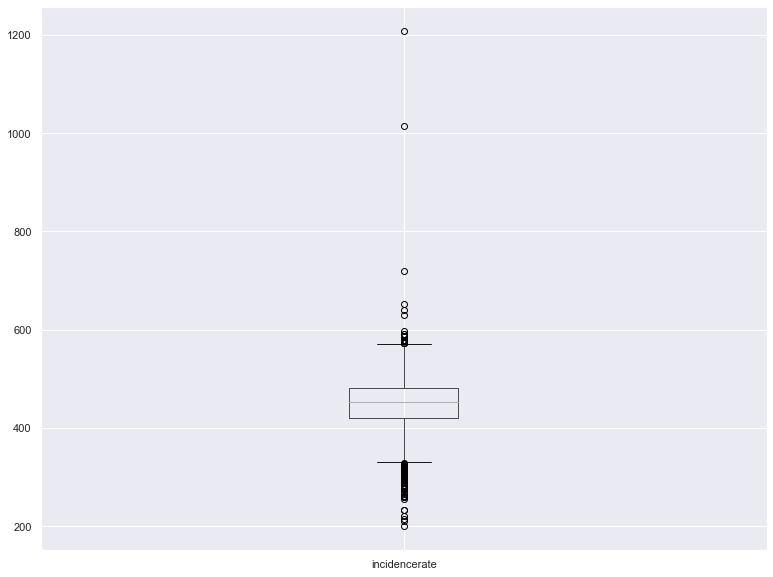

In [30]:
df.boxplot(column=['incidencerate'])

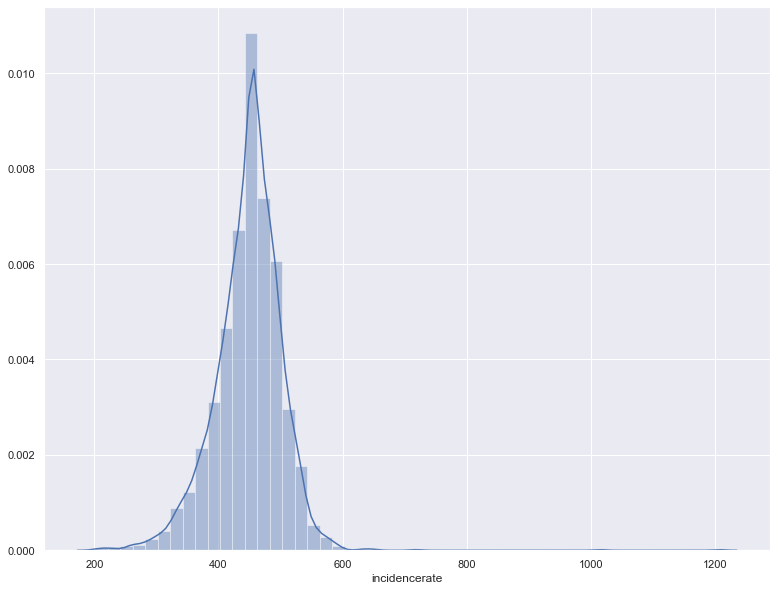

In [31]:
sns.distplot(df['incidencerate'])

Incidence rate seems to follow a somewhat normal disitribution centered around the mean (448). This shows that on average, most counties report mean per capita (100,000) cancer diagnoses of between 400 to around 540. The Incidence rate by definition is the mean per capita cancer diagnosis, making it a better predictor for the mean per capita cancer mortality rate as opposed to the mean annual cancer occurrence represented by the avganncount column and  the fact that it has minimal skewness as compared to the avganncount column makes it even more suitable. The incidence rate is also calculated on the same scale as the mean per capita cancer mortality rate.

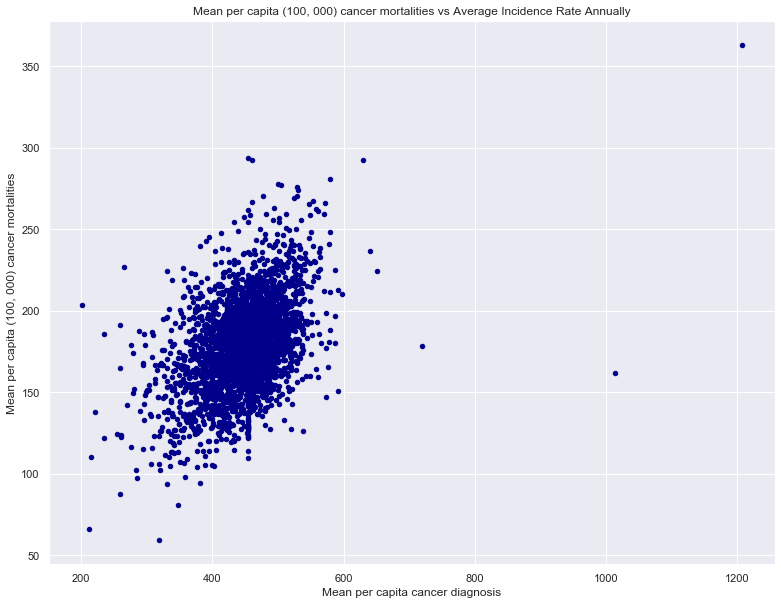

In [32]:
df[['incidencerate', 'target_deathrate']].plot.scatter(x="incidencerate", y="target_deathrate", c='DarkBlue')
plt.xlabel('Mean per capita cancer diagnosis')
plt.ylabel('Mean per capita (100, 000) cancer mortalities')
plt.title('Mean per capita (100, 000) cancer mortalities vs Average Incidence Rate Annually')
plt.show()

From the plot above, there seems to exist a relationship between the mean per capita cancer diagnosis made and the mean per capita cancer mortality rate. It can be observed that generally, as the mean per capita cancer diagnosis made increases, the mean per capita cancer mortality also tends to increase with it. Also, most points cluster between mean per capita cancer diagnosis in the range of about 400 to about 550 heading torwards 600.

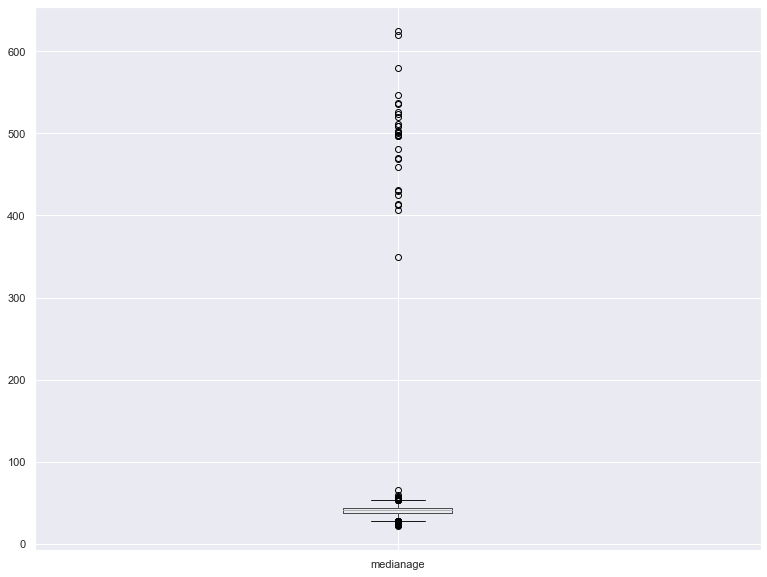

In [33]:
df.boxplot(column=['medianage'])

In [34]:
df['medianage'].max()

624.0

We seem to have a problem with our median age feature where some values in the column are way off what we would expect under normal circumstances. Clearly a median age of 624 is propostrous given our understanding of life expectancy. We have an outlier problem with medianage that we need to find a way to fix.

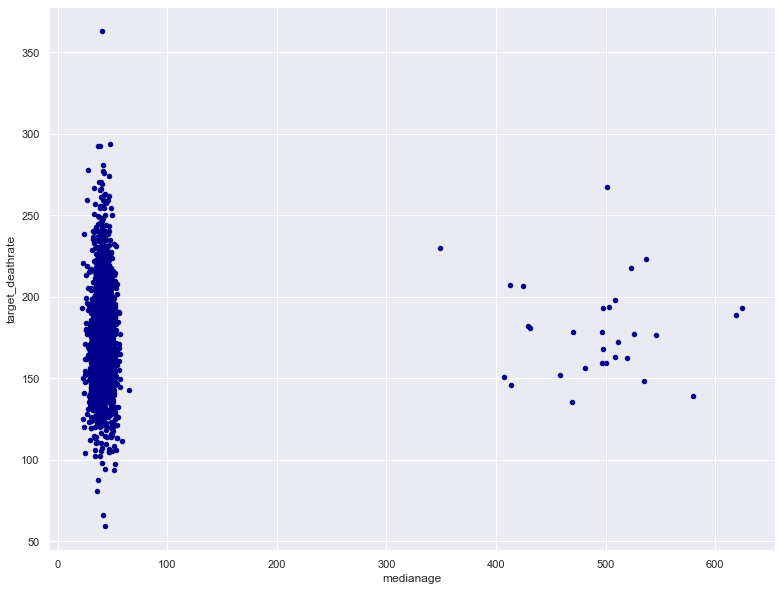

In [35]:
df[['target_deathrate', 'medianage']].plot.scatter(x="medianage", y="target_deathrate", c='DarkBlue')

This plot just helps visualize the inconsistencies observed in the medianage feature. To fix this inconsistency, we will calculate the medianage from the mean of meanagemale and meanagefemale features and use this new value to update rows with 'abnormal' values in the medianage column. This however introduces a collinearity problem among these 3 features that we will observer later on in the notebook.

In [36]:
#loop through each row in the dataframe identifying rows with abnormal medianage values
#and update them with new calculated values

for index, row in df.iterrows():
    if row['medianage'] > 300:
        df.at[index, 'medianage'] = (row['medianagemale'] + row['medianagefemale'])/2

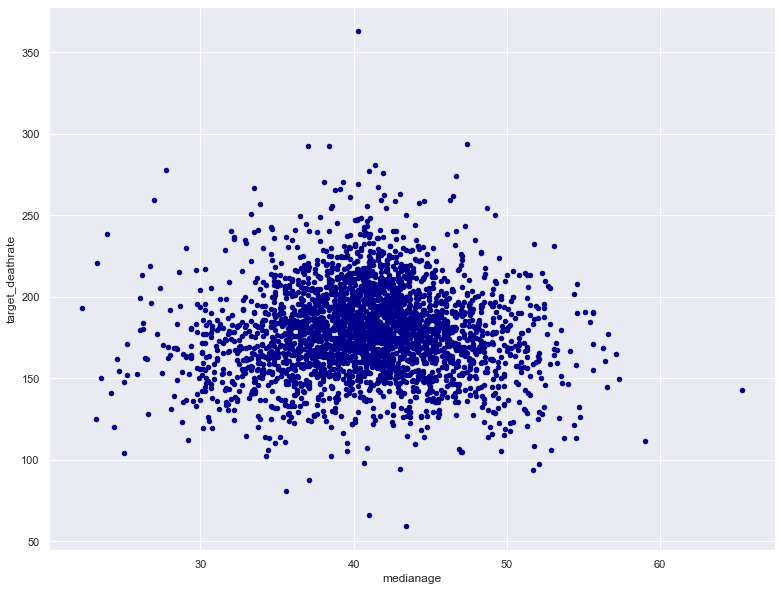

In [37]:
df[['target_deathrate', 'medianage']].plot.scatter(x="medianage", y="target_deathrate", c='DarkBlue')

After the fix we applied earlier, we now see that the extreme outliers we had observed have been removed.

In [38]:
print(df['medianage'].min(), df['medianage'].max())

22.3 65.3


In [39]:
print(df['medianagemale'].min(), df['medianagemale'].max())

22.4 64.7


In [40]:
print(df['medianagefemale'].min(), df['medianagefemale'].max())

22.3 65.7


In [41]:
# what is the most affected age group
age_columns = ['medianage', 'medianagefemale', 'medianagemale']
cols = []
for age_column in age_columns:
    conditions = [
        ((round(df[age_column]) >= 20) & (round(df[age_column]) <= 29)),
        ((round(df[age_column]) >= 30) & (round(df[age_column]) <= 39)),
        ((round(df[age_column]) >= 40) & (round(df[age_column]) <= 49)),
        ((round(df[age_column]) >= 50) & (round(df[age_column]) <= 59)),
        ((round(df[age_column]) >= 60) & (round(df[age_column]) <= 69))
    ]
    choices = ['20-29', '30-39', '40-49', '50-59', '60-69']
    cols.append(pd.DataFrame({age_column: np.select(conditions, choices)}))

In [42]:
df_age_groups = pd.concat([cols[0], cols[1], cols[2]], axis=1)

In [43]:
df_age_groups.head()

medianage medianagefemale medianagemale
0     30-39           40-49         30-39
1     30-39           30-39         30-39
2     40-49           40-49         40-49
3     40-49           40-49         40-49
4     40-49           40-49         40-49

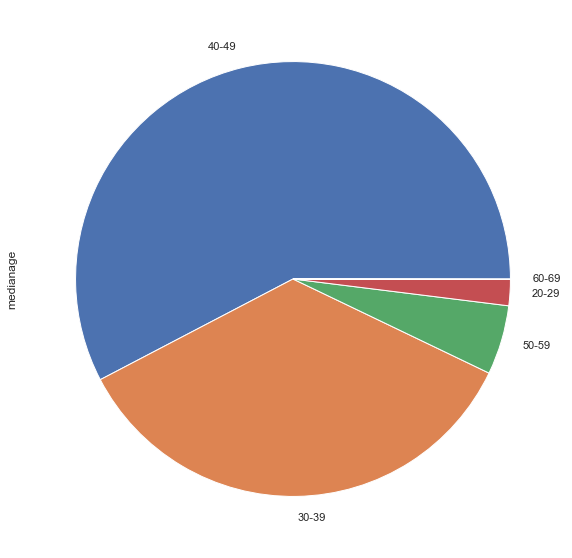

In [44]:
df_age_groups['medianage'].value_counts().plot.pie()

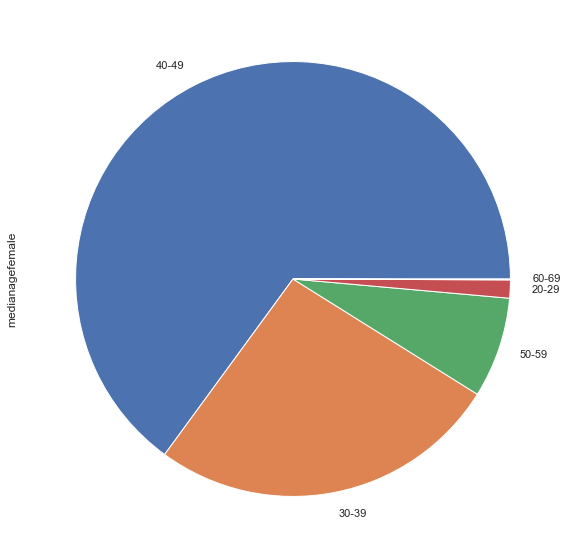

In [45]:
df_age_groups['medianagefemale'].value_counts().plot.pie()

In [46]:
df_age_groups['medianagemale'].value_counts()

40-49    1432
30-39    1397
50-59     121
20-29      95
60-69       2
Name: medianagemale, dtype: int64

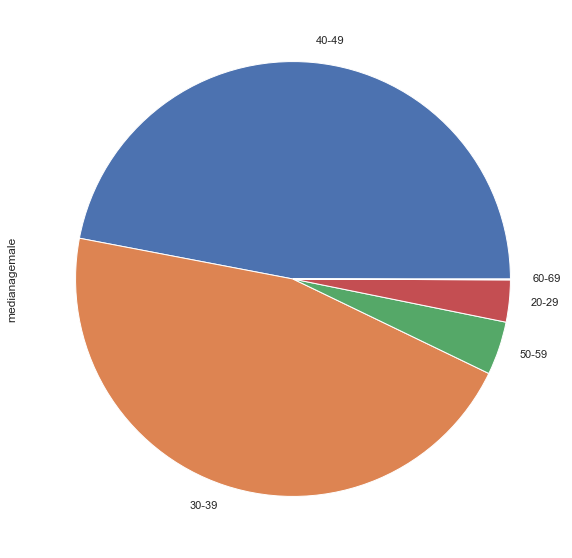

In [47]:
df_age_groups['medianagemale'].value_counts().plot.pie()

From the plots, we see that the most prominent age group in the dataset is the age group of 40-49 followed by 30-39. It appears that this is the age group greatly afflicted by cancer as per the pie charts above. To get a nice summary of the age group data, we will only pick the age-group summary for the median age and add it to our dataframe.

In [48]:
#adding age_group summary data to the dataframe
df['age_group'] = df_age_groups['medianage']

In [49]:
df.head()

avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popest2015  povertypercent  studypercap           binnedinc  medianage  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   medianagemale  medianagefemale                     geography  \
0           36.9             41.7     Kitsap County, Washington   
1           32.2             33.7   Kittitas County, Washington   
2           44.0             45.8  Klickitat County, Washington   
3           42.2             43.4      Lewis County, Washington   
4           47.8             48.9    Lincoln County, Washington   

   percentmarried  pctnohs18_24  pcths18_24  pctbachdeg18_24  pcths25_over  \
0            52.5          11.5        39.5              6.9          23.2   
1            44.5           6.1        22.4              7.5          26.0   
2            54.2          24.0        36.6              9.5          29.0   
3            52.7          20.2        41.2              2.5          31.6   
4            57.8          14.9        43.0              2.0          33.4   

   pctbachdeg25_over  pctunemployed16_over  pctprivatecoverage  \
0               19.6                   8.0                75.1   
1               22.7                   7.8                70.2   
2               16.0                   7.0                63.7   
3                9.3                  12.1                58.4   
4               15.0                   4.8                61.6   

   pctempprivcoverage  pctpubliccoverage  pctpubliccoveragealone   pctwhite  \
0                41.6               32.9                    14.0  81.780529   
1                43.6               31.1                    15.3  89.228509   
2                34.9               42.1                    21.1  90.922190   
3                35.0               45.3                    25.0  91.744686   
4                35.1               44.0                    22.7  94.104024   

   pctblack  pctasian  pctotherrace  pctmarriedhouseholds  birthrate age_group  
0  2.594728  4.821857      1.843479             52.856076   6.118831     30-39  
1  0.969102  2.246233      3.741352             45.372500   4.333096     30-39  
2  0.739673  0.465898      2.747358             54.444868   3.729488     40-49  
3  0.782626  1.161359      1.362643             51.021514   4.603841     40-49  
4  0.270192  0.665830      0.492135             54.027460   6.796657     40-49

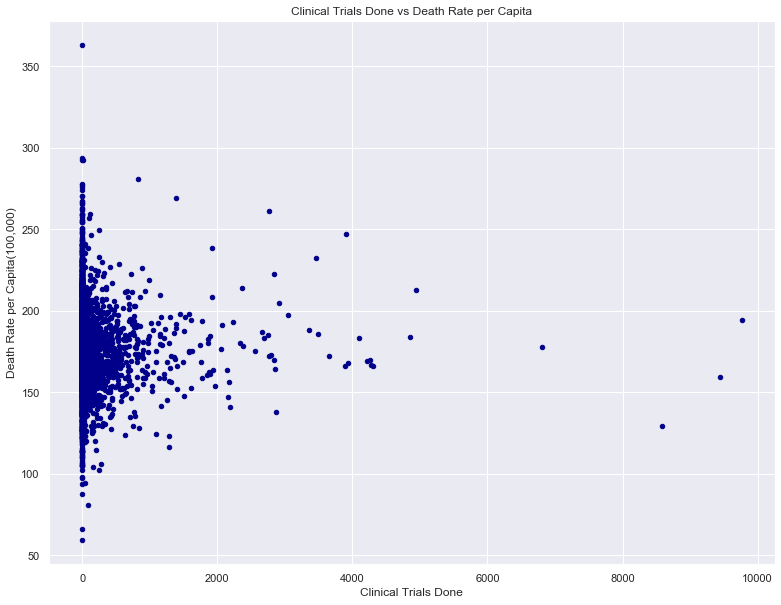

In [50]:
#How does the amount of research directed towards cancer treatment influence the mean per capita cancer mortality rates

df[['studypercap','target_deathrate']].plot.scatter(x='studypercap', y='target_deathrate', c='DarkBlue')
plt.xlabel('Clinical Trials Done')
plt.ylabel('Death Rate per Capita(100,000)')
plt.title('Clinical Trials Done vs Death Rate per Capita')
plt.show()


Here we see that the datapoints representing mean per capita cancer mortality rates are clustered more towards the left as the number of clincal trials done tends to zero. The number of clinical trials may be an indication of the level of research undertaken to improve cancer treatment methodologies and thus save or prolong the lives of cancer patients. The trend observed therefore, indicates that as more reasearch is directed towards cancer treatment, the number of people who succumb to the desease reduces as better treatment techniques are developed.

In [51]:
#How does the income level of the population influence the mean per capita cancer mortality rate

df['binnedinc'].value_counts()

[22640, 34218.1]      306
(54545.6, 61494.5]    306
(45201, 48021.6]      306
(51046.4, 54545.6]    305
(48021.6, 51046.4]    305
(42724.4, 45201]      305
(34218.1, 37413.8]    304
(40362.7, 42724.4]    304
(37413.8, 40362.7]    304
(61494.5, 125635]     302
Name: binnedinc, dtype: int64

In [52]:
df['binnedinc'] = df['binnedinc'].apply(lambda x: x.strip('[(]'))

In [53]:
df['binnedinc'].value_counts()

22640, 34218.1      306
54545.6, 61494.5    306
45201, 48021.6      306
51046.4, 54545.6    305
48021.6, 51046.4    305
42724.4, 45201      305
34218.1, 37413.8    304
37413.8, 40362.7    304
40362.7, 42724.4    304
61494.5, 125635     302
Name: binnedinc, dtype: int64

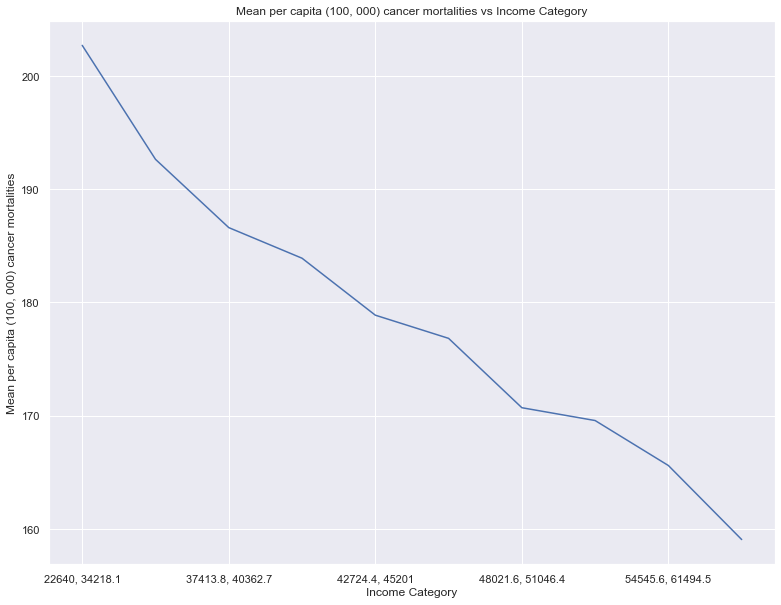

In [54]:
#Group the data by income category and assess how the mean per capita cancer mortality rate 
#varies as the income category increases

df.groupby('binnedinc')['target_deathrate'].mean().plot.line()
plt.xlabel('Income Category')
plt.ylabel('Mean per capita (100, 000) cancer mortalities')
plt.title('Mean per capita (100, 000) cancer mortalities vs Income Category')
plt.show()

Here we see a steady decline in the average number of deaths per capita as income level increases. As the Income level increases, the number of deaths per capita reduces steadily and hits a minimum for the income category falling within the 61494.5 - 125635 range.

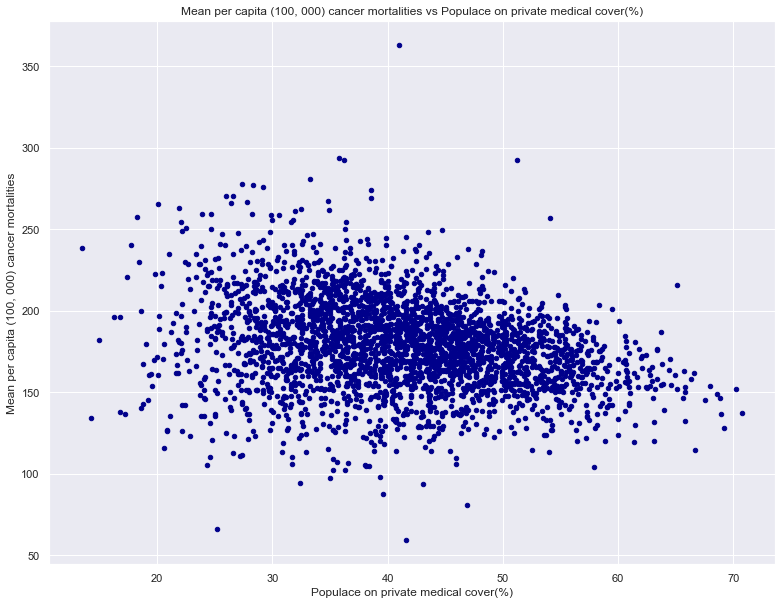

In [55]:
df[['pctempprivcoverage','target_deathrate']].plot.scatter(x='pctempprivcoverage', y='target_deathrate', c='DarkBlue')
plt.xlabel('Populace on private medical cover(%)')
plt.ylabel('Mean per capita (100, 000) cancer mortalities')
plt.title('Mean per capita (100, 000) cancer mortalities vs Populace on private medical cover(%)')
plt.show()

Here we can note that as the percentage of the population who can afford private medical cover increases, the cancer mortality rate per capita tends to reduce

### What is the relationship between geography and mean per capita cancer mortality rates?

For this, we will need to group our data based on geography. In this scenario, the data can be grouped per state seeing that the data is presented in the context of the United States of America Counties. Afterwards, an aggregation can be conducted on the mean per capita cancer mortality rates for each of the states making up the United States of America.

In [56]:
#Generate a new column labeled state and fill it with values extracted from the geography column
#The geography column contains a value indicating the county name and the state the county is in separated by a comma
#The state can be extracted by performing a split of the value contained in the rows of the geography column using the comma
#punctuation mark as the indicator of where to perform the split.

df['state'] = df.apply(lambda row: row['geography'].split(',')[1].strip(), axis=1)

In [57]:
df.head()

avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popest2015  povertypercent  studypercap         binnedinc  medianage  \
0      260131            11.2   499.748204   61494.5, 125635       39.3   
1       43269            18.6    23.111234  48021.6, 51046.4       33.0   
2       21026            14.6    47.560164  48021.6, 51046.4       45.0   
3       75882            17.1   342.637253    42724.4, 45201       42.8   
4       10321            12.5     0.000000  48021.6, 51046.4       48.3   

   medianagemale  medianagefemale                     geography  \
0           36.9             41.7     Kitsap County, Washington   
1           32.2             33.7   Kittitas County, Washington   
2           44.0             45.8  Klickitat County, Washington   
3           42.2             43.4      Lewis County, Washington   
4           47.8             48.9    Lincoln County, Washington   

   percentmarried  pctnohs18_24  pcths18_24  pctbachdeg18_24  pcths25_over  \
0            52.5          11.5        39.5              6.9          23.2   
1            44.5           6.1        22.4              7.5          26.0   
2            54.2          24.0        36.6              9.5          29.0   
3            52.7          20.2        41.2              2.5          31.6   
4            57.8          14.9        43.0              2.0          33.4   

   pctbachdeg25_over  pctunemployed16_over  pctprivatecoverage  \
0               19.6                   8.0                75.1   
1               22.7                   7.8                70.2   
2               16.0                   7.0                63.7   
3                9.3                  12.1                58.4   
4               15.0                   4.8                61.6   

   pctempprivcoverage  pctpubliccoverage  pctpubliccoveragealone   pctwhite  \
0                41.6               32.9                    14.0  81.780529   
1                43.6               31.1                    15.3  89.228509   
2                34.9               42.1                    21.1  90.922190   
3                35.0               45.3                    25.0  91.744686   
4                35.1               44.0                    22.7  94.104024   

   pctblack  pctasian  pctotherrace  pctmarriedhouseholds  birthrate  \
0  2.594728  4.821857      1.843479             52.856076   6.118831   
1  0.969102  2.246233      3.741352             45.372500   4.333096   
2  0.739673  0.465898      2.747358             54.444868   3.729488   
3  0.782626  1.161359      1.362643             51.021514   4.603841   
4  0.270192  0.665830      0.492135             54.027460   6.796657   

  age_group       state  
0     30-39  Washington  
1     30-39  Washington  
2     40-49  Washington  
3     40-49  Washington  
4     40-49  Washington

In [58]:
#Group the data by state and get the mean per capita cancer mortality rate per state 
#by gettting the mean of the target_deathrate column

grouped_by_state = df.groupby('state').agg({'target_deathrate': 'mean'})
grouped_by_state.reset_index(level=0, inplace=True)

In [59]:
grouped_by_state.head()

state  target_deathrate
0     Alabama        192.728571
1      Alaska        193.416667
2     Arizona        149.086667
3    Arkansas        200.090667
4  California        158.096491

To get a better understating of the per state mean per capita cancer mortality rates, we will need a map plot to visualize the variations of the mean per capita cancer mortality rates per state. We, therefore, need the latitude and logitude coordinates for each state for us to be able to generate this map plot

In [60]:
#Loading latitude and logitude coordinates for each state in the USA
state_lat_long = pd.read_csv('statelatlong.csv')
state_lat_long_formatted = state_lat_long.rename(columns={'state': 'state_abbr', 'name': 'state'})

In [61]:
state_lat_long_formatted.head()

state_abbr   latitude   longitude       state
0         AK  63.588753 -154.493062      Alaska
1         AL  32.318231  -86.902298     Alabama
2         AR  35.201050  -91.831833    Arkansas
3         AZ  34.048928 -111.093731     Arizona
4         CA  36.778261 -119.417932  California

In [62]:
#We the merge the dataframe containing the statistics grouped per state 
#with the dataframe containing the latitude and longitude coordinates of each state

grouped_by_state_with_lat_long = pd.merge(grouped_by_state, state_lat_long_formatted, how='left', on='state')

In [63]:
grouped_by_state_with_lat_long.head()

state  target_deathrate state_abbr   latitude   longitude
0     Alabama        192.728571         AL  32.318231  -86.902298
1      Alaska        193.416667         AK  63.588753 -154.493062
2     Arizona        149.086667         AZ  34.048928 -111.093731
3    Arkansas        200.090667         AR  35.201050  -91.831833
4  California        158.096491         CA  36.778261 -119.417932

In [64]:
grouped_by_state_with_lat_long.duplicated().sum()

0

In [65]:
grouped_by_state_with_lat_long['target_deathrate'].describe()

count     51.000000
mean     174.518096
std       16.810280
min      135.751852
25%      163.365590
50%      175.422388
75%      185.053634
max      215.315833
Name: target_deathrate, dtype: float64

Below is a heatmap showing how the mean per capita cancer mortality rate varies across the states

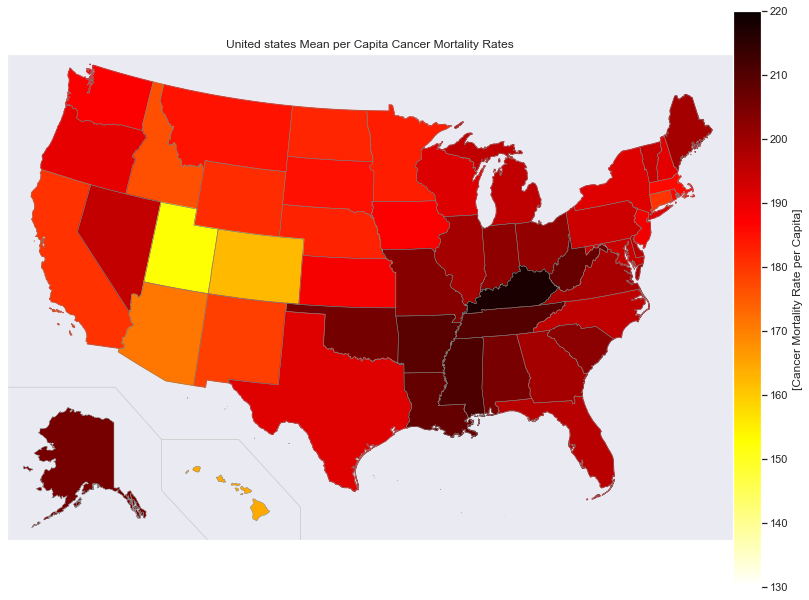

In [66]:
"""
This plot has been adopted from the matplotlib\basemap examples on github
and modified to fit the context of our visualizationd

The url to the basemap example project: https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py
"""


from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase
fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(
    llcrnrlon=-119,
    llcrnrlat=20,
    urcrnrlon=-64,
    urcrnrlat=49,
    projection='lcc',
    lat_1=33,
    lat_2=45,
    lon_0=-95
)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(
    llcrnrlon=-190,
    llcrnrlat=20,
    urcrnrlon=-143,
    urcrnrlat=46,
    projection='merc',
    lat_ts=20
)  # do not change these numbers

#%% ---------   draw state boundaries  ----------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00', 'states', drawbounds=True, linewidth=0.45, color='gray')
shp_info_ = m_.readshapefile('st99_d00', 'states', drawbounds=False)

colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'reversed hot' colormap
vmin = 130; vmax = 220 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        target_deathrate = grouped_by_state_with_lat_long.loc[grouped_by_state_with_lat_long['state'] == statename, 'target_deathrate'].iloc[0]
        #calling colormap with value between 0 and 1 returns rgba value.  
        #Invert color range (hot colors are high mean per capita cancer mortality rates), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((target_deathrate-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape, seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)

AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

ax.set_title('United states Mean per Capita Cancer Mortality Rates')

#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                  label=r'[Cancer Mortality Rate per Capita]')

plt.show()

In [67]:
grouped_by_state_with_lat_long[grouped_by_state_with_lat_long['target_deathrate'] <= 136]

state  target_deathrate state_abbr  latitude   longitude
44  Utah        135.751852         UT  39.32098 -111.093731

In [68]:
grouped_by_state_with_lat_long[grouped_by_state_with_lat_long['target_deathrate'] >= 215]

state  target_deathrate state_abbr   latitude  longitude
17  Kentucky        215.315833         KY  37.839333 -84.270018

From the plot, we see that most states with high cancer mortalities are clustered towards the east coast with the state having the highest mean per capita cancer mortality being Kentucky. Utah, Colorado, Hawaii and Arizona have the lowest reported mean per capita cancer mortalities.

In [69]:
df.head()

avganncount  avgdeathsperyear  target_deathrate  incidencerate  medincome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popest2015  povertypercent  studypercap         binnedinc  medianage  \
0      260131            11.2   499.748204   61494.5, 125635       39.3   
1       43269            18.6    23.111234  48021.6, 51046.4       33.0   
2       21026            14.6    47.560164  48021.6, 51046.4       45.0   
3       75882            17.1   342.637253    42724.4, 45201       42.8   
4       10321            12.5     0.000000  48021.6, 51046.4       48.3   

   medianagemale  medianagefemale                     geography  \
0           36.9             41.7     Kitsap County, Washington   
1           32.2             33.7   Kittitas County, Washington   
2           44.0             45.8  Klickitat County, Washington   
3           42.2             43.4      Lewis County, Washington   
4           47.8             48.9    Lincoln County, Washington   

   percentmarried  pctnohs18_24  pcths18_24  pctbachdeg18_24  pcths25_over  \
0            52.5          11.5        39.5              6.9          23.2   
1            44.5           6.1        22.4              7.5          26.0   
2            54.2          24.0        36.6              9.5          29.0   
3            52.7          20.2        41.2              2.5          31.6   
4            57.8          14.9        43.0              2.0          33.4   

   pctbachdeg25_over  pctunemployed16_over  pctprivatecoverage  \
0               19.6                   8.0                75.1   
1               22.7                   7.8                70.2   
2               16.0                   7.0                63.7   
3                9.3                  12.1                58.4   
4               15.0                   4.8                61.6   

   pctempprivcoverage  pctpubliccoverage  pctpubliccoveragealone   pctwhite  \
0                41.6               32.9                    14.0  81.780529   
1                43.6               31.1                    15.3  89.228509   
2                34.9               42.1                    21.1  90.922190   
3                35.0               45.3                    25.0  91.744686   
4                35.1               44.0                    22.7  94.104024   

   pctblack  pctasian  pctotherrace  pctmarriedhouseholds  birthrate  \
0  2.594728  4.821857      1.843479             52.856076   6.118831   
1  0.969102  2.246233      3.741352             45.372500   4.333096   
2  0.739673  0.465898      2.747358             54.444868   3.729488   
3  0.782626  1.161359      1.362643             51.021514   4.603841   
4  0.270192  0.665830      0.492135             54.027460   6.796657   

  age_group       state  
0     30-39  Washington  
1     30-39  Washington  
2     40-49  Washington  
3     40-49  Washington  
4     40-49  Washington

In [70]:
#How does the education level relate with the mean per capita cancer mortality rate
education_level=[
    'pctnohs18_24',
    'pcths18_24',
    'pctbachdeg18_24',
    'pcths25_over',
    'pctbachdeg25_over'
]

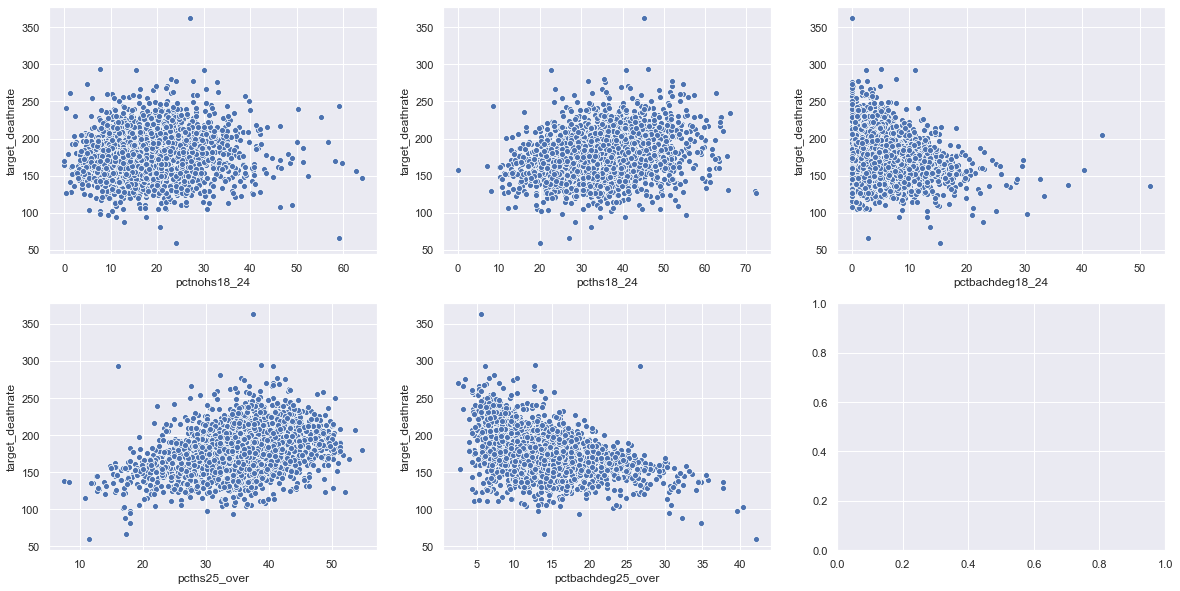

In [71]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(education_level, ax.flatten()):
    sns.scatterplot(df[variable], df['target_deathrate'], ax=subplot)

From the above plots, we see that as the percentage of the population on private medical cover increases, the mean per capita cancer mortality rate tends to reduce and the reverse is the case for the percentage of the population on public cover. Generally, private medical cover is more expensive that public cover and so having a greater population affording private cover may be an indication of higher income earnings and thus greater capability to afford the right cancer treatment, which in turn may result to reduced deaths due to cancer. The contrary is the case for a greater population being able to afford only public cover. It can be assumed that public cover does not quite cut it when it comes to catering for cancer treatment and as a result more cancer mortalities are experienced for those counties with a greater percentage of the population on public cover. 

In [72]:
#How does the coverage type relate with mean per capita cancer mortality rate
coverage_type=[
    'pctprivatecoverage',
    'pctempprivcoverage',
    'pctpubliccoverage',
    'pctpubliccoveragealone',
]

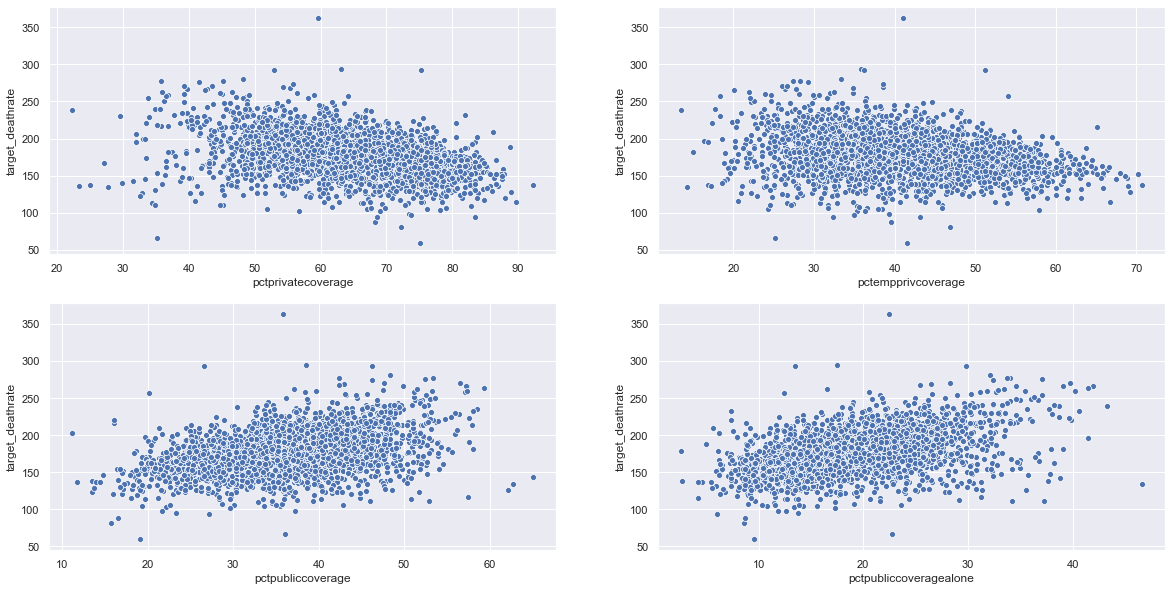

In [73]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(coverage_type, ax.flatten()):
    sns.scatterplot(df[variable], df['target_deathrate'], ax=subplot)

In [74]:
#How does race relate with mean per capita cancer mortality rate
race=[
    'pctwhite',
    'pctblack',
    'pctasian',
    'pctotherrace',
]

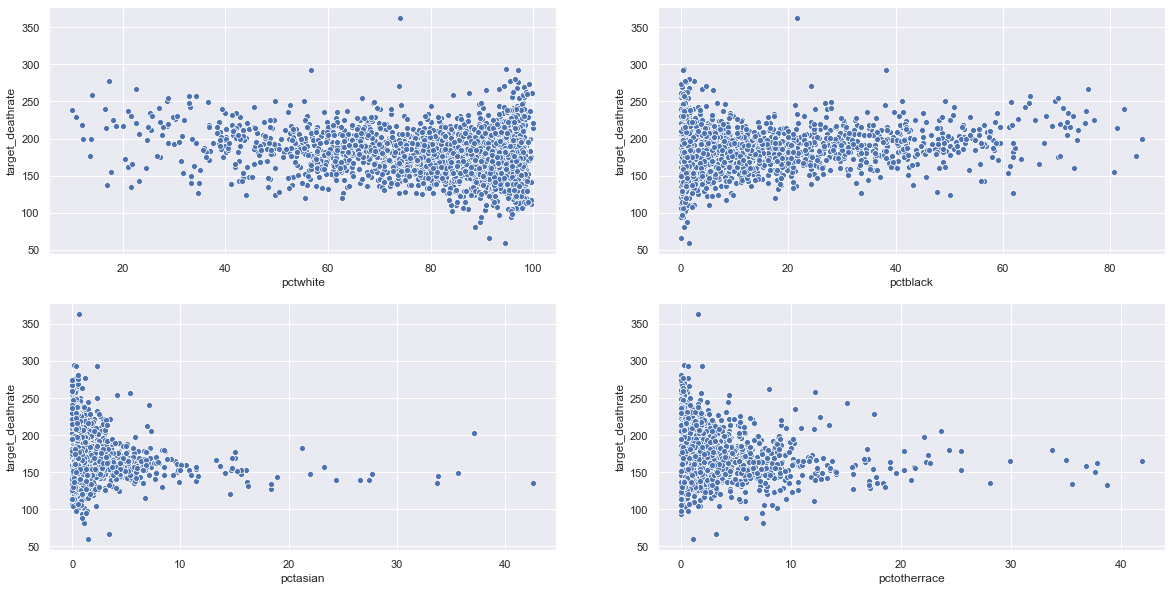

In [75]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(race, ax.flatten()):
    sns.scatterplot(df[variable], df['target_deathrate'], ax=subplot)

The race features, will not be reaally much helpful in this analysis as a greater percentage of the population is either white or black. There is a class imbalance in this feature and it may be safe to drop it from our analysis.

In [76]:
df.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctbachdeg18_24',
       'pcths25_over', 'pctbachdeg25_over', 'pctunemployed16_over',
       'pctprivatecoverage', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate', 'age_group',
       'state'],
      dtype='object')

In [77]:
#How does the marital status relate with mean per capita cancer mortality rate
marital_status=[
    'percentmarried',
    'pctmarriedhouseholds',
]

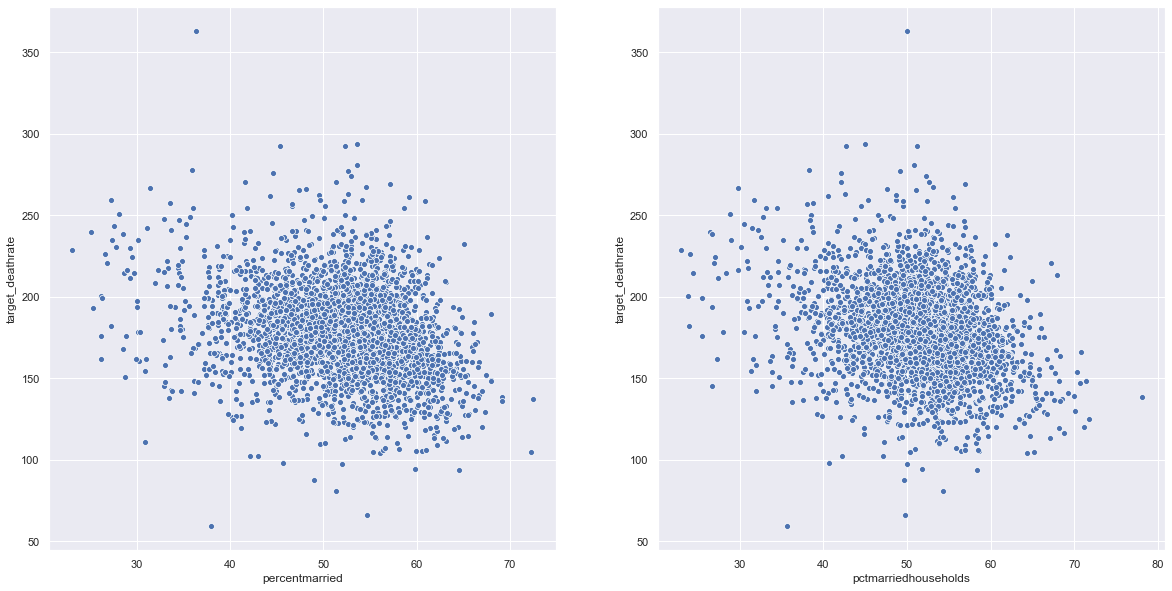

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for variable, subplot in zip(marital_status, ax.flatten()):
    sns.scatterplot(df[variable], df['target_deathrate'], ax=subplot)

From this plots, we see an almost similar distribution of data points indicating possibilities of rather high correlation among these two features. This plots also signify a weak, if any, linear relationship between marital status an the mean per capita cancer mortality rates.

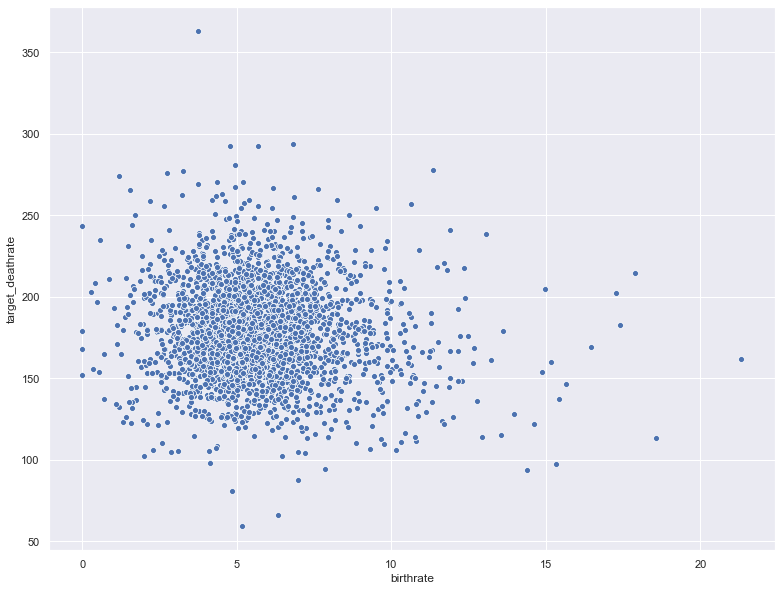

In [79]:
# How does birthrate relate to mean per capita cancer mortality rate
sns.scatterplot(df['birthrate'], df['target_deathrate'])

The birthrate against cancer mortality rate plot also signifies extremely week, if any, linear relationship.

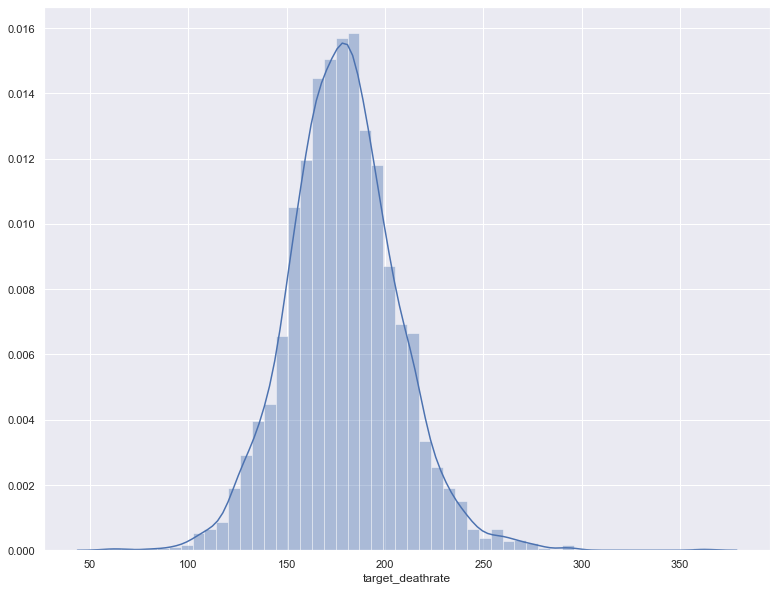

In [80]:
sns.distplot(df['target_deathrate'])

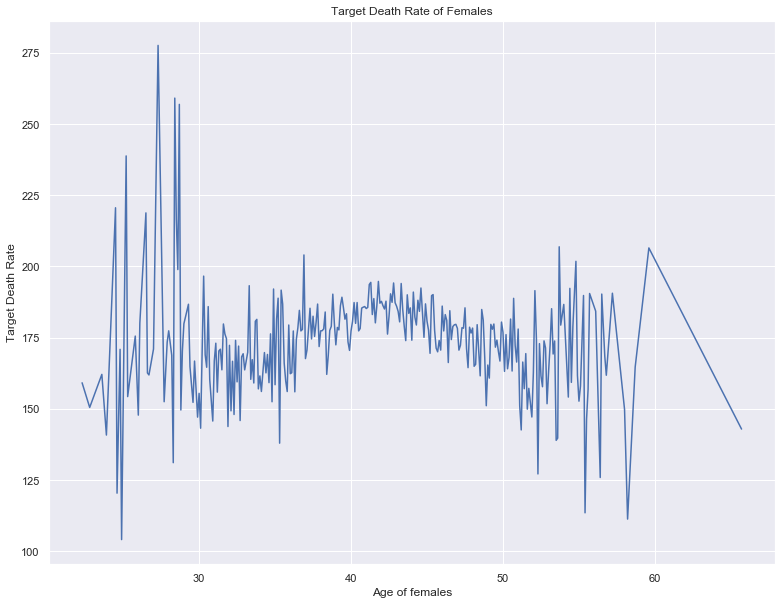

In [81]:
df.groupby('medianagefemale')['target_deathrate'].mean().plot.line()
plt.xlabel('Age of females')
plt.ylabel('Target Death Rate')
plt.title('Target Death Rate of Females')
plt.show()

most females of ages between 25 to 30 have higher cancer mortality rate as compared to other ages

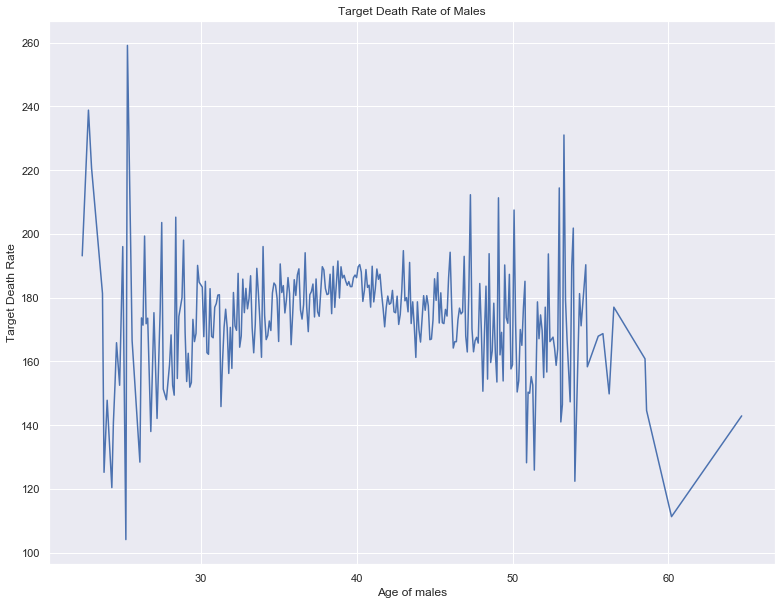

In [82]:
df.groupby('medianagemale')['target_deathrate'].mean().plot.line()
plt.xlabel('Age of males')
plt.ylabel('Target Death Rate')
plt.title('Target Death Rate of Males')
plt.show()

most people of age 25 to 27 have the highest cancer mortality rate.

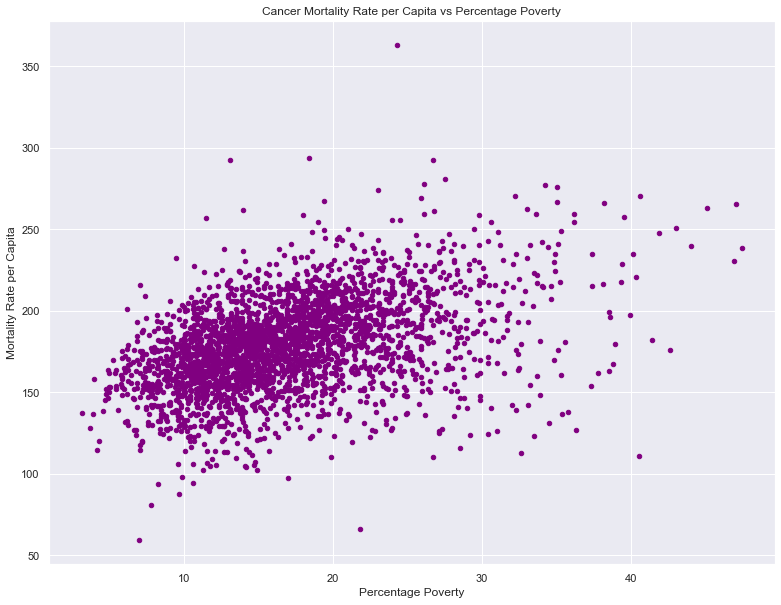

In [83]:
df[['povertypercent','target_deathrate']].plot.scatter(x='povertypercent', y='target_deathrate', c='purple')
plt.xlabel('Percentage Poverty')
plt.ylabel('Mortality Rate per Capita')
plt.title('Cancer Mortality Rate per Capita vs Percentage Poverty')
plt.show()

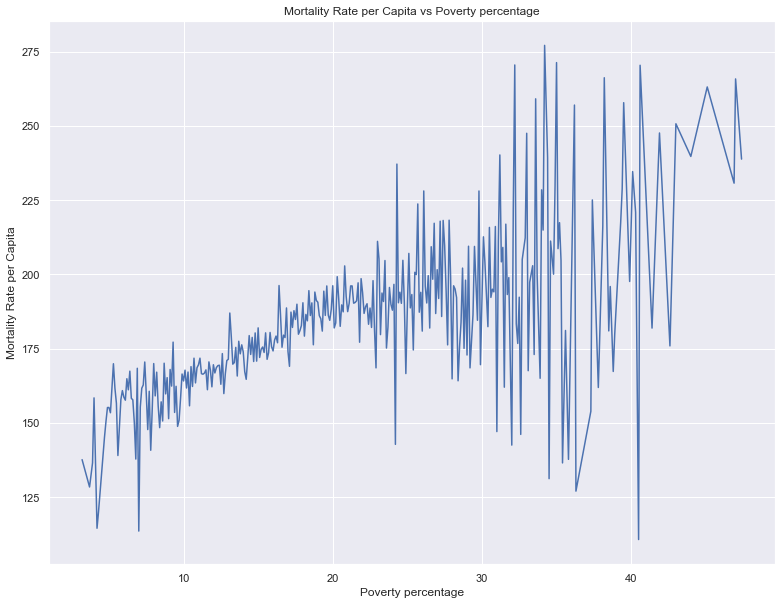

In [84]:
df.groupby('povertypercent')['target_deathrate'].mean().plot.line()
plt.xlabel('Poverty percentage')
plt.ylabel('Mortality Rate per Capita')
plt.title('Mortality Rate per Capita vs Poverty percentage')
plt.show()

The above graph has an upward trend, meaning most people who die of cancer are poor. This could be due to the expensive cancer treatments which is somewhat impossible for them to raise.

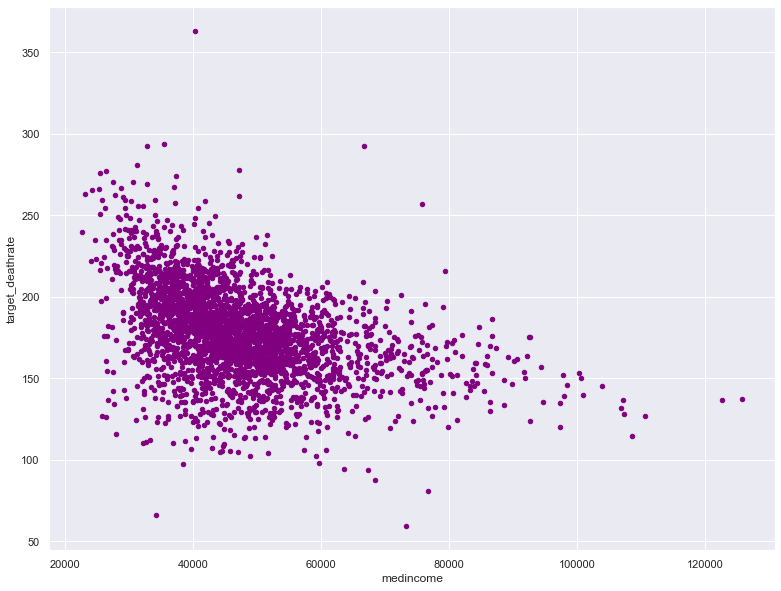

In [85]:
df[['medincome','target_deathrate']].plot.scatter(x='medincome', y='target_deathrate', c='purple')

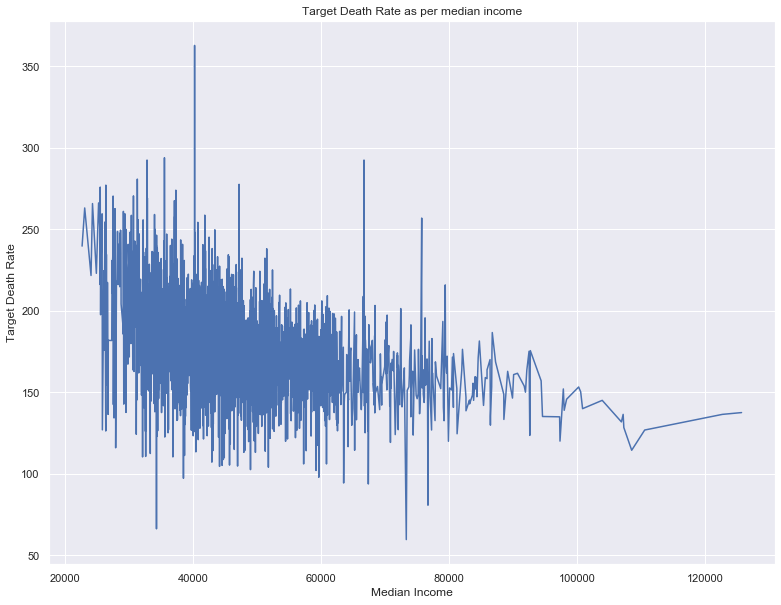

In [86]:
df.groupby('medincome')['target_deathrate'].median().plot.line()
plt.xlabel('Median Income')
plt.ylabel('Target Death Rate')
plt.title('Target Death Rate as per median income')
plt.show()

From the abvove graph we can conclude that people with low income have the highest death rate with the peak being people who earn around 40,000. This could also be as a result of expensive cancer treatments which they can barely afford.

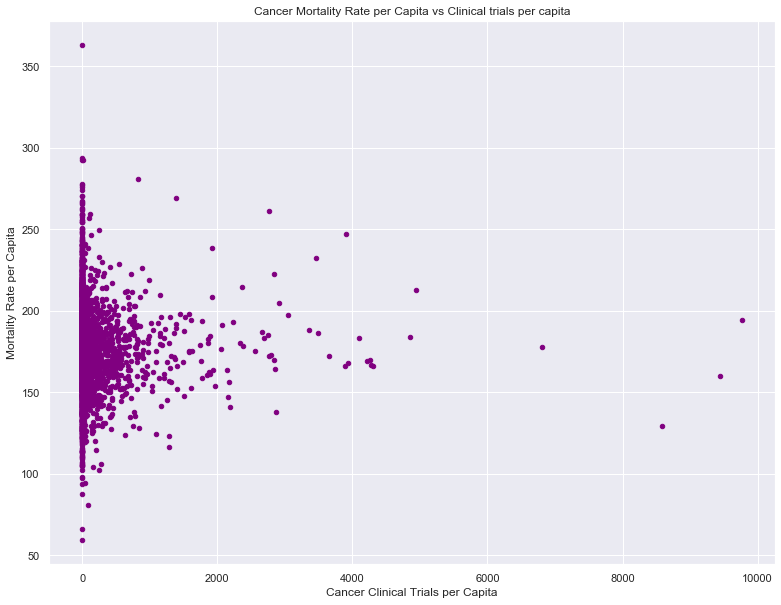

In [87]:
df[['studypercap','target_deathrate']].plot.scatter(x='studypercap', y='target_deathrate', c='purple')
plt.xlabel('Cancer Clinical Trials per Capita')
plt.ylabel('Mortality Rate per Capita')
plt.title('Cancer Mortality Rate per Capita vs Clinical trials per capita')
plt.show()

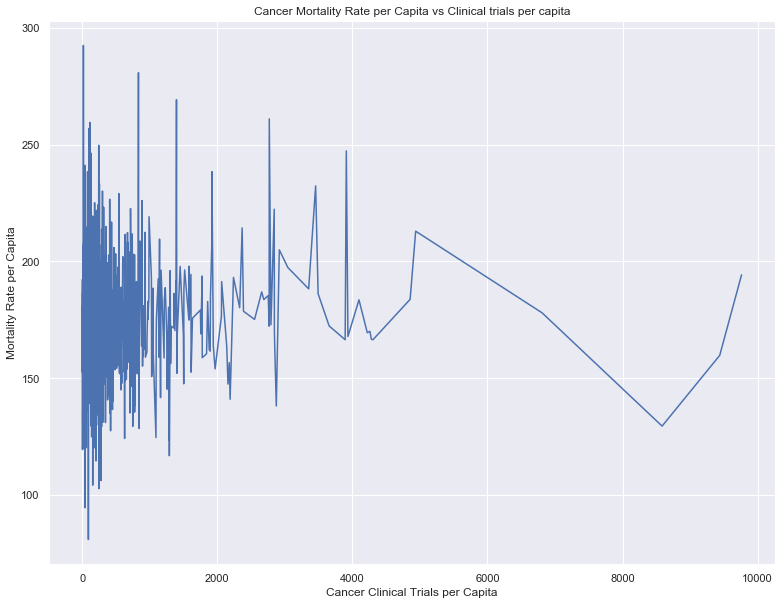

In [88]:
df.groupby('studypercap')['target_deathrate'].mean().plot.line()
plt.xlabel('Cancer Clinical Trials per Capita')
plt.ylabel('Mortality Rate per Capita')
plt.title('Cancer Mortality Rate per Capita vs Clinical trials per capita')
plt.show()

The cancer mortality rates per capita seem to cluster more torwards the left side of the graph where the average number of clinical trials done is almost equal or equal to zero. This may indicate that the regions with more cancer mortalities tend to have inferior treatment methodologies or lack proper treatment facilities thus leading to a high mortality rate.

In [89]:
df.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctbachdeg18_24',
       'pcths25_over', 'pctbachdeg25_over', 'pctunemployed16_over',
       'pctprivatecoverage', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate', 'age_group',
       'state'],
      dtype='object')

# SOLUTION IMPLEMENTATION

## 1.) Data preparation for training.

In [90]:
df.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctbachdeg18_24',
       'pcths25_over', 'pctbachdeg25_over', 'pctunemployed16_over',
       'pctprivatecoverage', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate', 'age_group',
       'state'],
      dtype='object')

In [91]:
#we are ignoring the columns that have little or no contribution to our analysis.

cols_to_drop =[
    #'avgdeathsperyear',
    ['target_deathrate', 'birthrate'],
    education_level,
    marital_status,
    race,
    #'geography',
    #'binnedinc',
    #'medianagefemale',
    #'medianagemale',
    #'pctmarriedhouseholds',
    ]
ignored_cols = [item for sublist in cols_to_drop for item in sublist]


In [92]:
ignored_cols

['target_deathrate',
 'birthrate',
 'pctnohs18_24',
 'pcths18_24',
 'pctbachdeg18_24',
 'pcths25_over',
 'pctbachdeg25_over',
 'percentmarried',
 'pctmarriedhouseholds',
 'pctwhite',
 'pctblack',
 'pctasian',
 'pctotherrace']

In [93]:
X = df.drop(columns=ignored_cols, axis=1)
y = df['target_deathrate']

In [94]:
X.head()

avganncount  avgdeathsperyear  incidencerate  medincome  popest2015  \
0       1397.0               469          489.8      61898      260131   
1        173.0                70          411.6      48127       43269   
2        102.0                50          349.7      49348       21026   
3        427.0               202          430.4      44243       75882   
4         57.0                26          350.1      49955       10321   

   povertypercent  studypercap         binnedinc  medianage  medianagemale  \
0            11.2   499.748204   61494.5, 125635       39.3           36.9   
1            18.6    23.111234  48021.6, 51046.4       33.0           32.2   
2            14.6    47.560164  48021.6, 51046.4       45.0           44.0   
3            17.1   342.637253    42724.4, 45201       42.8           42.2   
4            12.5     0.000000  48021.6, 51046.4       48.3           47.8   

   medianagefemale                     geography  pctunemployed16_over  \
0             41.7     Kitsap County, Washington                   8.0   
1             33.7   Kittitas County, Washington                   7.8   
2             45.8  Klickitat County, Washington                   7.0   
3             43.4      Lewis County, Washington                  12.1   
4             48.9    Lincoln County, Washington                   4.8   

   pctprivatecoverage  pctempprivcoverage  pctpubliccoverage  \
0                75.1                41.6               32.9   
1                70.2                43.6               31.1   
2                63.7                34.9               42.1   
3                58.4                35.0               45.3   
4                61.6                35.1               44.0   

   pctpubliccoveragealone age_group       state  
0                    14.0     30-39  Washington  
1                    15.3     30-39  Washington  
2                    21.1     40-49  Washington  
3                    25.0     40-49  Washington  
4                    22.7     40-49  Washington

###  1.1) Assessing for multicollinearity

Before feeding our data into our models, we need to determine whether we have multicollinearity expressed among our independent variables and if it exists we also need to understand how severe it is.

To assess for multicolinearity amongst our features, we will use the variance inflation factor which by definition is the ratio of the overall model variance to the variance of that model having only a single independent variable from the set of independent variables employed in the model. In simple terms, it is a measure of the amount of multicollinearity(entanglement - existence of dicernable relationships among independent variables) in a set of multiple regression variables.

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
num_features = X.drop(columns=['geography', 'binnedinc', 'state', 'age_group'], axis=1) 

In [97]:
vif = pd.DataFrame()

vif["vif_factor"] =  [variance_inflation_factor(num_features.values, j) for j in range(num_features.shape[1])]

vif["feature"] = num_features.columns

In [98]:
vif

vif_factor                 feature
0      11.027024             avganncount
1      33.600288        avgdeathsperyear
2      80.294430           incidencerate
3      64.796850               medincome
4      27.398992              popest2015
5      32.295742          povertypercent
6       1.115048             studypercap
7   14503.262935               medianage
8    4740.833806           medianagemale
9    3731.355232         medianagefemale
10     13.515411    pctunemployed16_over
11    312.021554      pctprivatecoverage
12    123.042487      pctempprivcoverage
13    460.052517       pctpubliccoverage
14    192.075078  pctpubliccoveragealone

From the above output, we can take note of the especially high variance inflation factors for the medianage, medianagefemale and medianagemale features. This implies the existence of a high collinearity among these features.

In [99]:
columns_suspected_collinear = [
    [
        'medianagefemale',
        'medianagemale',
        'medianage'
    ],
    #[
    #    'pctmarriedhouseholds',
    #    'percentmarried'
    #],
    [
        'pctprivatecoverage',
        'pctempprivcoverage',
        'pctpubliccoverage',
        'pctpubliccoveragealone'
    ],
    [
        'medincome',
        'povertypercent'
    ]
]

In [100]:
#Getting the collinearity

df_collinear = [num_features[x].corr() for x in columns_suspected_collinear]

In [101]:
df_collinear[0]

medianagefemale  medianagemale  medianage
medianagefemale         1.000000       0.933696   0.977147
medianagemale           0.933696       1.000000   0.984598
medianage               0.977147       0.984598   1.000000

In [102]:
df_collinear[1]

pctprivatecoverage  pctempprivcoverage  \
pctprivatecoverage                1.000000            0.827459   
pctempprivcoverage                0.827459            1.000000   
pctpubliccoverage                -0.720012           -0.778315   
pctpubliccoveragealone           -0.886234           -0.728823   

                        pctpubliccoverage  pctpubliccoveragealone  
pctprivatecoverage              -0.720012               -0.886234  
pctempprivcoverage              -0.778315               -0.728823  
pctpubliccoverage                1.000000                0.865833  
pctpubliccoveragealone           0.865833                1.000000

In [103]:
df_collinear[2]

medincome  povertypercent
medincome        1.000000       -0.788965
povertypercent  -0.788965        1.000000

### 1.2 Feature Scaling

#### Standardisation

The approach taken to adress the multicolineraity observed among some of the variable is feature scaling, specifically standadisation

In [104]:
num_features = num_features.drop(columns=[
    'avgdeathsperyear',
    'medianagefemale',
    'medianagemale',
    'pctempprivcoverage',
    'pctpubliccoverage',
    'pctpubliccoveragealone',
    'medincome'
])

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
std_scaler = StandardScaler()
X_rescaled = std_scaler.fit_transform(num_features)

In [107]:
X_rescaled_df = pd.DataFrame(X_rescaled, columns=num_features.columns)

In [108]:
X_rescaled_df.head()

avganncount  incidencerate  popest2015  povertypercent  studypercap  \
0     0.558328       0.761321    0.478696       -0.886102     0.650277   
1    -0.306003      -0.672179   -0.180448        0.268698    -0.249816   
2    -0.356140      -1.806881   -0.248055       -0.355519    -0.203646   
3    -0.126640      -0.327553   -0.081322        0.034617     0.353585   
4    -0.387917      -1.799549   -0.280592       -0.683232    -0.293460   

   medianage  pctunemployed16_over  pctprivatecoverage  
0  -0.293775              0.042757            1.009370  
1  -1.506704             -0.015184            0.549074  
2   0.803637             -0.246947           -0.061524  
3   0.380075              1.230541           -0.559396  
4   1.438981             -0.884295           -0.258794

In [109]:
vif_after_standardisation = pd.DataFrame()

vif_after_standardisation["vif_factor"] =  [variance_inflation_factor(X_rescaled_df.values, j) for j in range(X_rescaled_df.shape[1])]

vif_after_standardisation["feature"] = X_rescaled_df.columns

In [110]:
vif_after_standardisation

vif_factor               feature
0    7.670585           avganncount
1    1.093558         incidencerate
2    7.656405            popest2015
3    3.676417        povertypercent
4    1.020906           studypercap
5    1.119996             medianage
6    1.933445  pctunemployed16_over
7    3.577522    pctprivatecoverage

After the standardisation operation on the dataset, we see that the variance inflation factors for our features has greatly reduced indicating that the serverenes of multicolinearity in our features has also dropped quite significantly. Standardisation was chosen here because it does not have a bounding range and therefore does not affect outliers in the data.
The following link elaborates more about standardisation vs normalisation: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [111]:
#drop features with variance inflation factor greater than 5 after feature scaling

for index, row in vif_after_standardisation.iterrows():
    if row['vif_factor'] > 5:
        X_rescaled_df.drop(row['feature'], inplace=True, axis=1)
        

In [112]:
X_rescaled_df.head()

incidencerate  povertypercent  studypercap  medianage  \
0       0.761321       -0.886102     0.650277  -0.293775   
1      -0.672179        0.268698    -0.249816  -1.506704   
2      -1.806881       -0.355519    -0.203646   0.803637   
3      -0.327553        0.034617     0.353585   0.380075   
4      -1.799549       -0.683232    -0.293460   1.438981   

   pctunemployed16_over  pctprivatecoverage  
0              0.042757            1.009370  
1             -0.015184            0.549074  
2             -0.246947           -0.061524  
3              1.230541           -0.559396  
4             -0.884295           -0.258794

### 1.3) Encoding categorical features

In [113]:
X_rescaled_df_with_cat = pd.concat([X_rescaled_df, X[['geography', 'binnedinc', 'state', 'age_group']]], axis=1)

In [114]:
X_rescaled_df_with_cat.head()

incidencerate  povertypercent  studypercap  medianage  \
0       0.761321       -0.886102     0.650277  -0.293775   
1      -0.672179        0.268698    -0.249816  -1.506704   
2      -1.806881       -0.355519    -0.203646   0.803637   
3      -0.327553        0.034617     0.353585   0.380075   
4      -1.799549       -0.683232    -0.293460   1.438981   

   pctunemployed16_over  pctprivatecoverage                     geography  \
0              0.042757            1.009370     Kitsap County, Washington   
1             -0.015184            0.549074   Kittitas County, Washington   
2             -0.246947           -0.061524  Klickitat County, Washington   
3              1.230541           -0.559396      Lewis County, Washington   
4             -0.884295           -0.258794    Lincoln County, Washington   

          binnedinc       state age_group  
0   61494.5, 125635  Washington     30-39  
1  48021.6, 51046.4  Washington     30-39  
2  48021.6, 51046.4  Washington     40-49  
3    42724.4, 45201  Washington     40-49  
4  48021.6, 51046.4  Washington     40-49

In [115]:
from sklearn.preprocessing import LabelEncoder

lb_income_category = LabelEncoder()
X_rescaled_df_with_cat['binnedinc_code'] = lb_income_category.fit_transform(X_rescaled_df_with_cat['binnedinc'])
X_rescaled_df_with_cat[['binnedinc', 'binnedinc_code']].head(11)

#X_rescaled_df_with_encoded_cat = pd.get_dummies(X_rescaled_df_with_encoded_cat, columns=['binnedinc'], prefix=['binnedinc'], drop_first=True)

binnedinc  binnedinc_code
0    61494.5, 125635               9
1   48021.6, 51046.4               6
2   48021.6, 51046.4               6
3     42724.4, 45201               4
4   48021.6, 51046.4               6
5   51046.4, 54545.6               7
6   37413.8, 40362.7               2
7   37413.8, 40362.7               2
8   40362.7, 42724.4               3
9   54545.6, 61494.5               8
10  54545.6, 61494.5               8

In [116]:
lb_income_category = LabelEncoder()
X_rescaled_df_with_cat['age_group_code'] = lb_income_category.fit_transform(X_rescaled_df_with_cat['age_group'])
X_rescaled_df_with_cat[['age_group', 'age_group_code']].head(11)

age_group  age_group_code
0      30-39               1
1      30-39               1
2      40-49               2
3      40-49               2
4      40-49               2
5      40-49               2
6      40-49               2
7      50-59               3
8      40-49               2
9      30-39               1
10     50-59               3

In [117]:
X_rescaled_df_with_encoded_cat = pd.get_dummies(X_rescaled_df_with_cat, columns=['state'], prefix=['state'], drop_first=True)

In [118]:
X_rescaled_df_with_encoded_cat.head()

incidencerate  povertypercent  studypercap  medianage  \
0       0.761321       -0.886102     0.650277  -0.293775   
1      -0.672179        0.268698    -0.249816  -1.506704   
2      -1.806881       -0.355519    -0.203646   0.803637   
3      -0.327553        0.034617     0.353585   0.380075   
4      -1.799549       -0.683232    -0.293460   1.438981   

   pctunemployed16_over  pctprivatecoverage                     geography  \
0              0.042757            1.009370     Kitsap County, Washington   
1             -0.015184            0.549074   Kittitas County, Washington   
2             -0.246947           -0.061524  Klickitat County, Washington   
3              1.230541           -0.559396      Lewis County, Washington   
4             -0.884295           -0.258794    Lincoln County, Washington   

          binnedinc age_group  binnedinc_code  age_group_code  state_Alaska  \
0   61494.5, 125635     30-39               9               1             0   
1  48021.6, 51046.4     30-39               6               1             0   
2  48021.6, 51046.4     40-49               6               2             0   
3    42724.4, 45201     40-49               4               2             0   
4  48021.6, 51046.4     40-49               6               2             0   

   state_Arizona  state_Arkansas  state_California  state_Colorado  \
0              0               0                 0               0   
1              0               0                 0               0   
2              0               0                 0               0   
3              0               0                 0               0   
4              0               0                 0               0   

   state_Connecticut  state_Delaware  state_District of Columbia  \
0                  0               0                           0   
1                  0               0                           0   
2                  0               0                           0   
3                  0               0                           0   
4                  0               0                           0   

   state_Florida  state_Georgia  state_Hawaii  state_Idaho  state_Illinois  \
0              0              0             0            0               0   
1              0              0             0            0               0   
2              0              0             0            0               0   
3              0              0             0            0               0   
4              0              0             0            0               0   

   state_Indiana  state_Iowa  state_Kansas  state_Kentucky  state_Louisiana  \
0              0           0             0               0                0   
1              0           0             0               0                0   
2              0           0             0               0                0   
3              0           0             0               0                0   
4              0           0             0               0                0   

   state_Maine  state_Maryland  state_Massachusetts  state_Michigan  \
0            0               0                    0               0   
1            0               0                    0               0   
2            0               0                    0               0   
3            0               0                    0               0   
4            0               0                    0               0   

   state_Minnesota  state_Mississippi  state_Missouri  state_Montana  \
0                0                  0               0              0   
1                0                  0               0              0   
2                0                  0               0              0   
3                0                  0               0              0   
4                0                  0               0              0   

   state_Nebraska  state_Nevada  state_New Hampshire  state_New Jersey

In [119]:
X_final = X_rescaled_df_with_encoded_cat.drop(columns=[
    'geography',
    'binnedinc',
    'age_group'
])

In [120]:
X_final.head()

incidencerate  povertypercent  studypercap  medianage  \
0       0.761321       -0.886102     0.650277  -0.293775   
1      -0.672179        0.268698    -0.249816  -1.506704   
2      -1.806881       -0.355519    -0.203646   0.803637   
3      -0.327553        0.034617     0.353585   0.380075   
4      -1.799549       -0.683232    -0.293460   1.438981   

   pctunemployed16_over  pctprivatecoverage  binnedinc_code  age_group_code  \
0              0.042757            1.009370               9               1   
1             -0.015184            0.549074               6               1   
2             -0.246947           -0.061524               6               2   
3              1.230541           -0.559396               4               2   
4             -0.884295           -0.258794               6               2   

   state_Alaska  state_Arizona  state_Arkansas  state_California  \
0             0              0               0                 0   
1             0              0               0                 0   
2             0              0               0                 0   
3             0              0               0                 0   
4             0              0               0                 0   

   state_Colorado  state_Connecticut  state_Delaware  \
0               0                  0               0   
1               0                  0               0   
2               0                  0               0   
3               0                  0               0   
4               0                  0               0   

   state_District of Columbia  state_Florida  state_Georgia  state_Hawaii  \
0                           0              0              0             0   
1                           0              0              0             0   
2                           0              0              0             0   
3                           0              0              0             0   
4                           0              0              0             0   

   state_Idaho  state_Illinois  state_Indiana  state_Iowa  state_Kansas  \
0            0               0              0           0             0   
1            0               0              0           0             0   
2            0               0              0           0             0   
3            0               0              0           0             0   
4            0               0              0           0             0   

   state_Kentucky  state_Louisiana  state_Maine  state_Maryland  \
0               0                0            0               0   
1               0                0            0               0   
2               0                0            0               0   
3               0                0            0               0   
4               0                0            0               0   

   state_Massachusetts  state_Michigan  state_Minnesota  state_Mississippi  \
0                    0               0                0                  0   
1                    0               0                0                  0   
2                    0               0                0                  0   
3                    0               0                0                  0   
4                    0               0                0                  0   

   state_Missouri  state_Montana  state_Nebraska  state_Nevada  \
0               0              0               0             0   
1               0              0               0             0   
2               0              0               0             0   
3               0              0               0             0   
4               0              0               0             0   

   state_New Hampshire  state_New Jersey  state_New Mexico  state_New York  \
0                    0                 0                 0               0   
1                    0                 0                 0               0   
2   

### 1.4) Model training and prediction

In [121]:
from sklearn.model_selection import train_test_split, cross_validate

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=7)

X_train.shape, X_test.shape

((2437, 58), (610, 58))

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

RMSE value for k=  1 is: 27.111323023149822
RMSE value for k=  2 is: 23.592048274859025
RMSE value for k=  3 is: 22.428525414678223
RMSE value for k=  4 is: 21.281174408883345
RMSE value for k=  5 is: 20.804700367394123
RMSE value for k=  6 is: 20.62378063956394
RMSE value for k=  7 is: 20.497511766674464
RMSE value for k=  8 is: 20.287252480738072
RMSE value for k=  9 is: 20.27543410864161
RMSE value for k=  10 is: 20.18839390651446


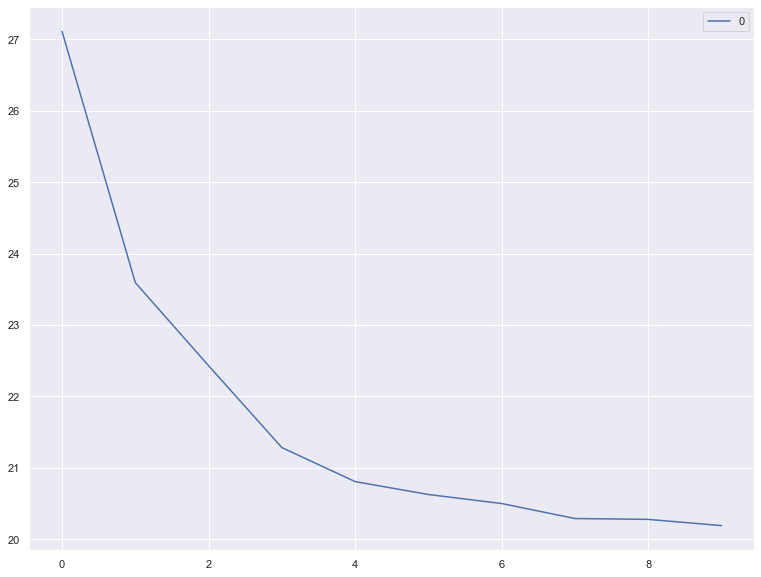

In [124]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(metrics.mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [125]:
#K NEAREST NEIGHBORS algorithm

knn = KNeighborsRegressor(n_neighbors=10)

#train model
knn.fit(X_train, y_train)

## use trained model to make predictions on x_test
y_pred_knn = knn.predict(X_test)

knn_mae = metrics.mean_absolute_error(y_test, y_pred_knn)
knn_mse = metrics.mean_squared_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn))
knn_r2 = metrics.r2_score(y_test, y_pred_knn)

print('K NEAREST NEIGHBORS')
print('Mean Absolute Error:', knn_mae)  
print('Mean Squared Error:', knn_mse)  
print('Root Mean Squared Error:', knn_rmse)  
print('R2:', knn_r2)  

K NEAREST NEIGHBORS
Mean Absolute Error: 14.997475409836063
Mean Squared Error: 407.5712485245901
Root Mean Squared Error: 20.18839390651446
R2: 0.4810861425866003


In [126]:
knn_residuals = (y_test-y_pred_knn)
knn_residuals_df = pd.DataFrame({'predicted': y_pred_knn, 'residuals': knn_residuals })

In [127]:
knn_residuals_df.head()

predicted  residuals
1171     161.08     -32.68
1425     191.93      17.97
2125     182.93      -6.53
454      159.76      13.34
1395     192.87     -32.87

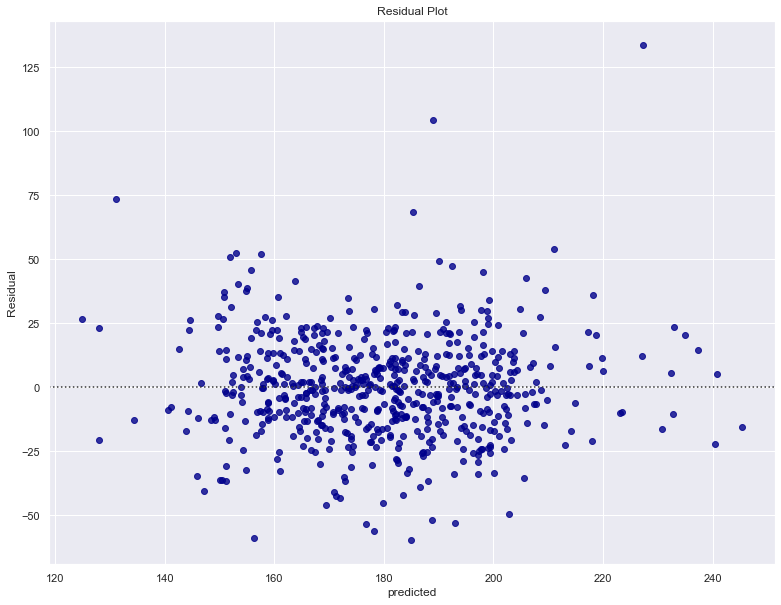

In [128]:
sns.residplot(y='residuals', x='predicted', data=knn_residuals_df, color='darkblue')
plt.title("Residual Plot")
plt.xlabel("predicted")
plt.ylabel("Residual")
plt.show()

Our residual plot does not show any clear patterns and this may mean that our model obeys the assumption of homoscedasticity

In [129]:
# Linear Regression Algorithm

lr = LinearRegression()

# train model
lr.fit(X_train, y_train)

# use trained model to make predictions on x_test
y_pred_lr = lr.predict(X_test)

In [130]:
lr_mae = metrics.mean_absolute_error(y_test, y_pred_lr)
lr_mse = metrics.mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_lr))
lr_r2 = metrics.r2_score(y_test, y_pred_lr)

print('Linear Regression')
print('Mean Absolute Error', lr_mae)
print('Mean Squared Error', lr_mse)
print('Root Mean Squared Error',lr_rmse)
print('R2 Score',lr_r2)

Linear Regression
Mean Absolute Error 14.184014409881645
Mean Squared Error 361.9773046291454
Root Mean Squared Error 3.766167071424427
R2 Score 0.5391356968353904


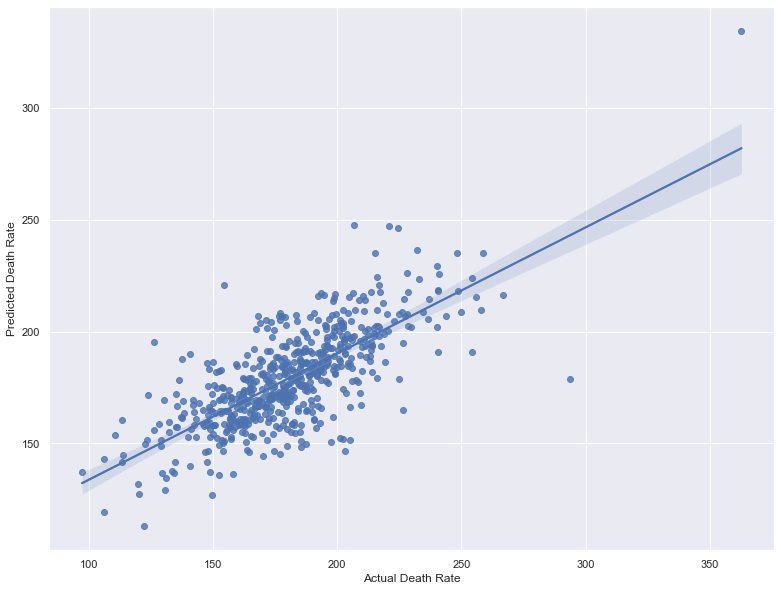

In [131]:
ax = sns.regplot(x = y_test, y = y_pred_lr)
ax.set(xlabel = 'Actual Death Rate',
      ylabel = 'Predicted Death Rate')
plt.show()

In [132]:
compare = pd.DataFrame({'Actual' : y_test,
                        'Predicted' : y_pred_lr})

compare.describe()


Actual   Predicted
count  610.000000  610.000000
mean   180.338689  179.025439
std     28.048549   21.491366
min     97.300000  113.209259
25%    162.200000  164.382954
50%    179.250000  177.714314
75%    196.275000  191.871792
max    362.800000  334.194868

In [133]:
lr_residuals = (y_test-y_pred_lr)
lr_residuals_df = pd.DataFrame({'prediction': y_pred_lr, 'residuals': lr_residuals })

In [134]:
lr_residuals_df.head()

prediction  residuals
1171  158.490405 -30.090405
1425  182.381210  27.518790
2125  169.772212   6.627788
454   164.329047   8.770953
1395  159.665784   0.334216

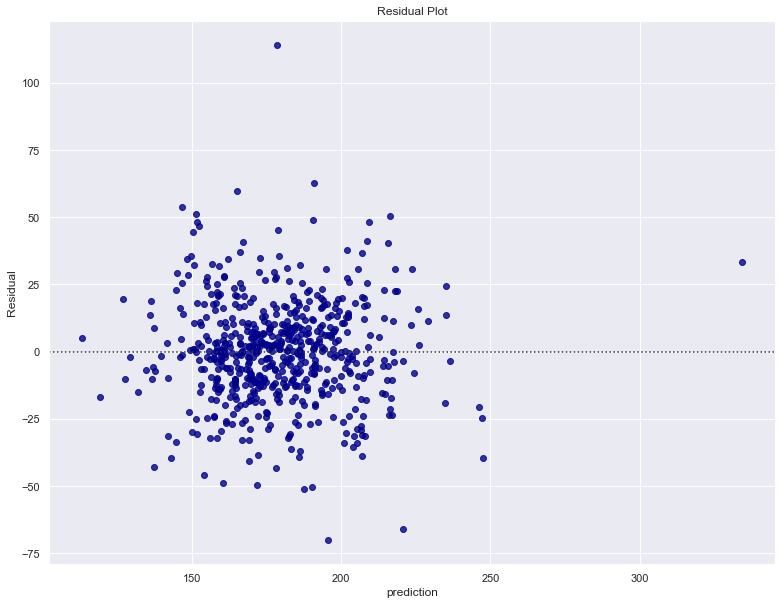

In [135]:
sns.residplot(y='residuals', x='prediction', data=lr_residuals_df, color='darkblue')
plt.title("Residual Plot")
plt.xlabel("prediction")
plt.ylabel("Residual")
plt.show()

In [136]:
compare = pd.DataFrame({'Actual' : y_test,
                        'Predicted' : pred})

compare.describe()

Actual   Predicted
count  610.000000  610.000000
mean   180.338689  179.886361
std     28.048549   18.848634
min     97.300000  124.960000
25%    162.200000  166.132500
50%    179.250000  179.870000
75%    196.275000  193.162500
max    362.800000  245.290000

In [137]:
# Decision Tree Algorithm

dt = DecisionTreeRegressor()

# train model
dt.fit(X_train, y_train)

# use trained model to make predictions on x_test
y_pred_dt = dt.predict(X_test)

In [138]:
dt_mae = metrics.mean_absolute_error(y_test, y_pred_dt)
dt_mse = metrics.mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_dt))
dt_r2 = metrics.r2_score(y_test, y_pred_dt)

print('Decision Tree')
print('Mean Absolute Error', dt_mae)
print('Mean Squared Error', dt_mse)
print('Root Mean Squared Error',dt_rmse)
print('R2 Score',dt_r2)

Decision Tree
Mean Absolute Error 20.729508196721312
Mean Squared Error 729.6404262295082
Root Mean Squared Error 4.55296696635516
R2 Score 0.07103229319997595


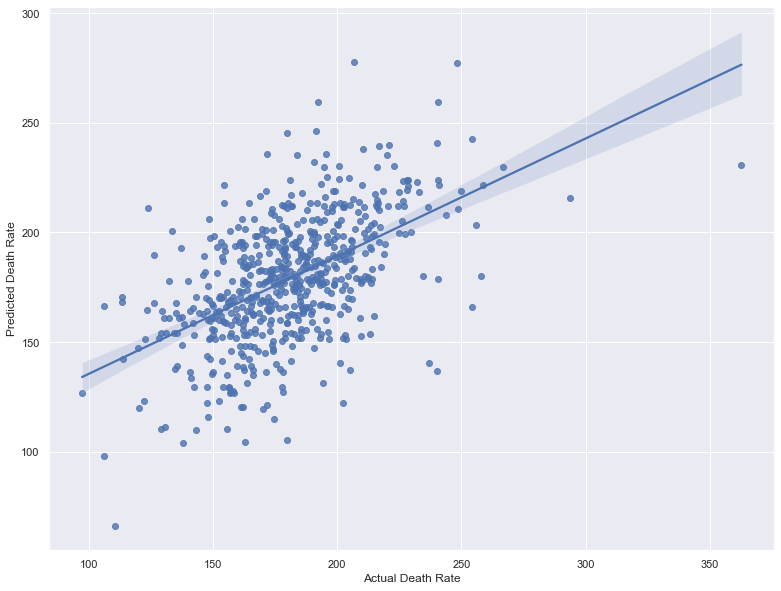

In [139]:
ax = sns.regplot(x = y_test, y = y_pred_dt)
ax.set(xlabel = 'Actual Death Rate',
      ylabel = 'Predicted Death Rate')
plt.show()

In [140]:
compare = pd.DataFrame({'Actual' : y_test,
                        'Predicted' : y_pred_dt})

compare.describe()

Actual   Predicted
count  610.000000  610.000000
mean   180.338689  178.639344
std     28.048549   28.030672
min     97.300000   66.300000
25%    162.200000  161.250000
50%    179.250000  178.550000
75%    196.275000  196.525000
max    362.800000  277.600000

In [141]:
rf = RandomForestRegressor(n_estimators=100)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_mae = metrics.mean_absolute_error(y_test, y_pred_rf)
rf_mse = metrics.mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_rf))
rf_r2 = metrics.r2_score(y_test, y_pred_dt)

print('Random Forest')
print('Mean Absolute Error', rf_mae)
print('Mean Squared Error', rf_mse)
print('Root Mean Squared Error',rf_rmse)
print('R2 Score',rf_r2)

Random Forest
Mean Absolute Error 14.365127868852458
Mean Squared Error 387.4693822918034
Root Mean Squared Error 3.790135600325199
R2 Score 0.07103229319997595


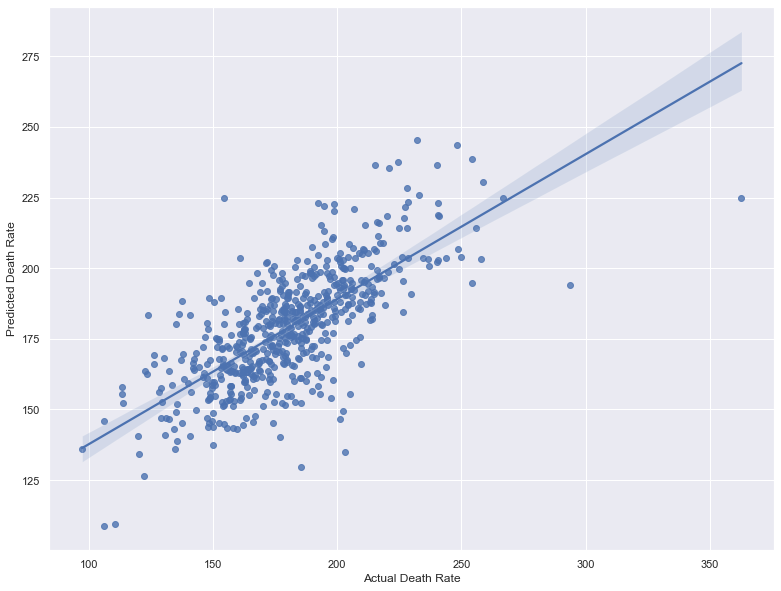

In [142]:
ax = sns.regplot(x = y_test, y = y_pred_rf)
ax.set(xlabel = 'Actual Death Rate',
      ylabel = 'Predicted Death Rate')
plt.show()

In [143]:
gb = GradientBoostingRegressor()

gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

gb_mae = metrics.mean_absolute_error(y_test, y_pred_gb)
gb_mse = metrics.mean_squared_error(y_test, y_pred_gb)
gb_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_gb))
gb_r2 = metrics.r2_score(y_test, y_pred_gb)

print('Gradient Boost')
print('Mean Absolute Error', gb_mae)
print('Mean Squared Error', gb_mse)
print('Root Mean Squared Error',gb_rmse)
print('R2 Score',gb_r2)

Gradient Boost
Mean Absolute Error 13.972737753657446
Mean Squared Error 370.3130998789984
Root Mean Squared Error 3.7380125405966
R2 Score 0.5285226820965735


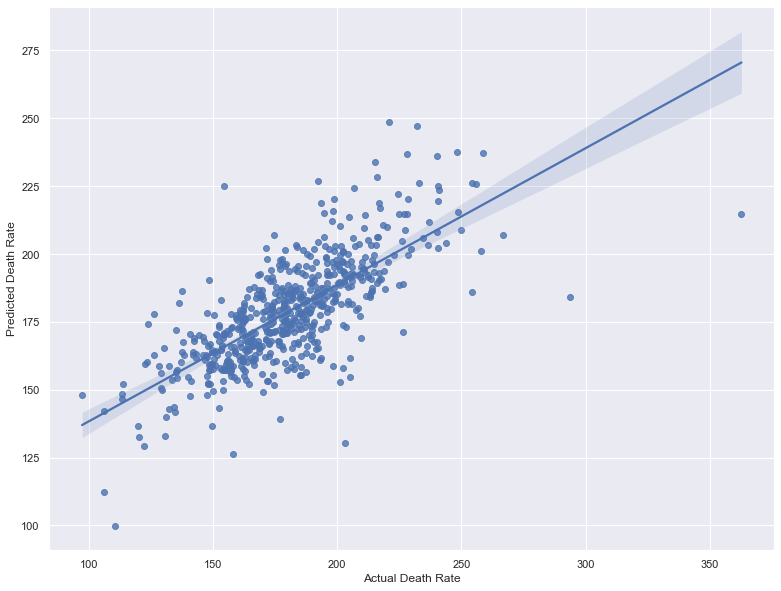

In [144]:
ax = sns.regplot(x = y_test, y = y_pred_gb)
ax.set(xlabel = 'Actual Death Rate',
      ylabel = 'Predicted Death Rate')
plt.show()

In [145]:
df_valid = pd.DataFrame({'Actual':y_test, 'Linear Regression':y_pred_lr, 'Decision Tree':y_pred_dt, 'K Nearest Neighbors':pred, 'Random Forest':y_pred_rf, 'Gradient Booster':y_pred_gb})
df_valid

Actual  Linear Regression  Decision Tree  K Nearest Neighbors  \
1171   128.4         158.490405          151.9               161.08   
1425   209.9         182.381210          177.9               191.93   
2125   176.4         169.772212          206.0               182.93   
454    173.1         164.329047          158.3               159.76   
1395   160.0         159.665784          202.5               192.87   
2269   135.4         157.339044          154.1               160.85   
2059   240.5         218.109443          224.0               217.29   
2166   234.4         208.595144          180.3               199.22   
1134   165.9         168.841134          168.5               166.95   
2375   201.4         184.742658          179.0               187.56   
1684   159.5         184.514075          161.8               179.54   
1109   179.3         202.725861          180.0               194.13   
562    184.3         195.042804          187.2               200.14   
2861   188.5         179.956682          165.8               175.71   
415    160.3         172.077770          173.4               170.66   
720    219.0         199.006954          190.4               203.75   
705    214.7         199.193937          204.5               203.60   
2027   174.4         175.207148          176.2               167.01   
1475   144.3         167.874252          163.3               163.46   
1625   185.1         187.922471          182.3               186.17   
2537   171.8         201.524239          236.0               196.36   
2827   154.3         150.965012          213.4               164.38   
2252   178.9         160.496866          154.1               156.75   
652    179.7         168.339692          158.6               159.14   
180    163.5         150.574878          183.6               174.71   
2834   171.4         205.158717          219.1               205.65   
713    213.7         217.717092          192.7               200.92   
2139   192.1         190.393956          187.5               187.22   
2685   192.0         170.285260          155.8               168.93   
1930   163.6         168.130530          169.1               171.55   
670    185.6         158.246490          151.9               150.88   
224    178.3         175.751091          196.1               191.15   
2809   202.5         151.800233          122.2               151.98   
2054   173.6         197.350909          210.7               197.29   
2486   172.7         169.202862          164.5               168.79   
868    180.1         185.009945          213.3               188.14   
716    183.7         204.574409          203.7               199.46   
362    181.9         183.102763          194.7               182.63   
2881   168.5         169.234749          163.5               166.38   
1568   189.8         164.075225          197.0               162.22   
377    183.3         179.609728          178.5               179.25   
2810    97.3         137.350089          126.9               156.35   
547    205.5         188.219575          196.7               199.72   
2336   190.0         186.422490          159.3               195.62   
2548   266.7         216.328675          230.1               211.06   
1337   177.9         163.443428          129.4               176.18   
2189   184.8         175.935937          176.0               165.32   
1181   156.1         164.305154          168.5               165.65   
1476   176.4         180.079581          171.3               183.23   
1090   106.1         119.217140           97.9               127.98   
1203   257.8         209.469495          180.1               234.96   
430    193.0         182.952682          204.7               202.59   
2163   248.2         235.296332          277.1               240.75   
2878   189.5         184.448222          176.6               181.24   
1453   191.5         156.867779          179.0               169.66   
1521   226.1         208.63962

In [146]:
model_comparison = {
    'Algorithm': ['Linear Regression', 'Decision Tree', 'Nearest Neighbour', 'Random Forest', 'Gradient Booster'],
    'Mean Absolute Error': [lr_mae, dt_mae, knn_mae, rf_mae, gb_mae],
    'Mean Squared Error': [lr_mse, dt_mse, knn_mse, rf_mse, gb_mse],
    'Root Mean Squared Error': [lr_rmse, dt_rmse, knn_rmse, rf_rmse, gb_rmse]
}

model_scores = pd.DataFrame(model_comparison)
model_scores

Algorithm  Mean Absolute Error  Mean Squared Error  \
0  Linear Regression            14.184014          361.977305   
1      Decision Tree            20.729508          729.640426   
2  Nearest Neighbour            14.997475          407.571249   
3      Random Forest            14.365128          387.469382   
4   Gradient Booster            13.972738          370.313100   

   Root Mean Squared Error  
0                 3.766167  
1                 4.552967  
2                20.188394  
3                 3.790136  
4                 3.738013

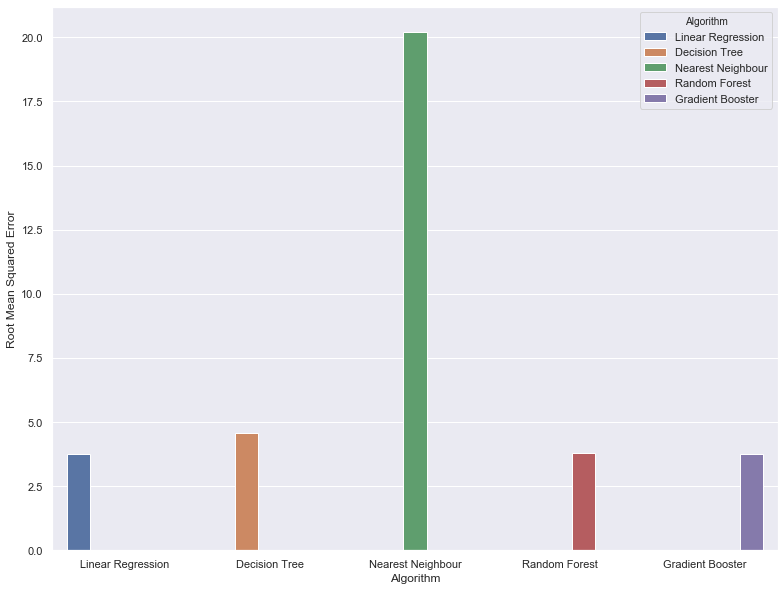

In [147]:
sns.barplot(y = 'Root Mean Squared Error', x = 'Algorithm', data=model_scores, hue='Algorithm')

our best performiong model was Linear Reression alg with an R2 Score of 57% and a low RMSE

## Cross Validation applied

In [148]:
from sklearn.model_selection import cross_val_score

In [149]:

knn = KNeighborsRegressor(n_neighbors=7)
knn_results = cross_val_score(
    knn, 
    X_final, 
    y, 
    cv=10, 
    scoring='r2'
).mean()

In [150]:
knn_results

0.3763154662157199

In [151]:
lr = LinearRegression()
lr_results = cross_validate(
    lr, 
    X_final, 
    y, 
    cv=10, 
    scoring=(
        'r2',
        'neg_mean_absolute_error',
        'neg_mean_squared_error', 
        'neg_root_mean_squared_error'
    )
)

In [152]:
lr_results_df = pd.DataFrame(lr_results)
lr_results_df.mean()

fit_time                              0.018348
score_time                            0.004468
test_r2                               0.430074
test_neg_mean_absolute_error        -15.222672
test_neg_mean_squared_error        -409.711022
test_neg_root_mean_squared_error    -20.101998
dtype: float64

In [153]:
gb = GradientBoostingRegressor()
gb_results = cross_validate(
    gb, 
    X_final, 
    y, 
    cv=10, 
    scoring=(
        'r2',
        'neg_mean_absolute_error',
        'neg_mean_squared_error', 
        'neg_root_mean_squared_error'
    )
)

In [154]:
gb_results_df = pd.DataFrame(gb_results)
gb_results_df.mean()

fit_time                              0.815718
score_time                            0.003697
test_r2                               0.426685
test_neg_mean_absolute_error        -15.202784
test_neg_mean_squared_error        -414.871257
test_neg_root_mean_squared_error    -20.249708
dtype: float64

## Conclusion

To conclude, our models have more or less conformed to the assumptions of linear regression as per the assessments we have done so far. However, we see that they performed rather poorly indicating that probably we need to revisit some of the choices we made while preparing the data or probably completely change the kinds of models chosen for this analysis. Our best model had an R2 score of about 50% and as such cannot be trusted to make valid predictions for the mean per capita cancer death rates

# Follow up questions

a). Did we have the right data?

YES. But had we had the data from ministry of health department of cancer, the models would have a much better accuracy

b). Did we have the right question?

YES!